In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

In [3]:
data_path = "data/creditcard.csv"
df = pd.read_csv(data_path)

In [4]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

In [5]:
print(f"Anomalies : {anomalies.shape}")
print(f"Normal : {normal.shape}")

# 정상 데이터에 편향되어있음

Anomalies : (492, 31)
Normal : (284315, 31)


Text(0, 0.5, 'Counts')

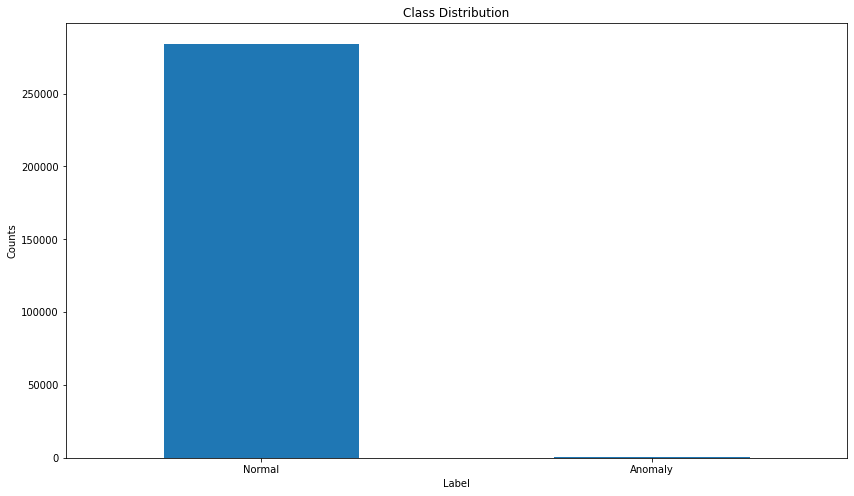

In [6]:
class_count = pd.value_counts(df["Class"], sort=True)
class_count.plot(kind="bar", rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

# 정상 데이터가 거의 보이지 않음


In [7]:
anomalies.Amount.describe()

# 대부분의 부정 거래가 100달러 미만이므로 부정 거래가 고액 거래인것은 아님
# 오른쪽으로 치우친 분포를 보임 = 오른쪽 꼬리가 긴 분포 = 양의 왜도(skewness)

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
def plot_histogram(df, bins, column, log_scale=False):
    bins = 100
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Count of {column} by Class')
    ax1.hist(anomalies[column], bins=bins, color="red")
    ax1.set_title("Anomaly")
    ax2.hist(normal[column], bins=bins, color="orange")
    ax2.set_title("Normal")
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

def plot_scatter(df, x_col, y_col, sharey=False):
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color="red")
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color="orange")
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

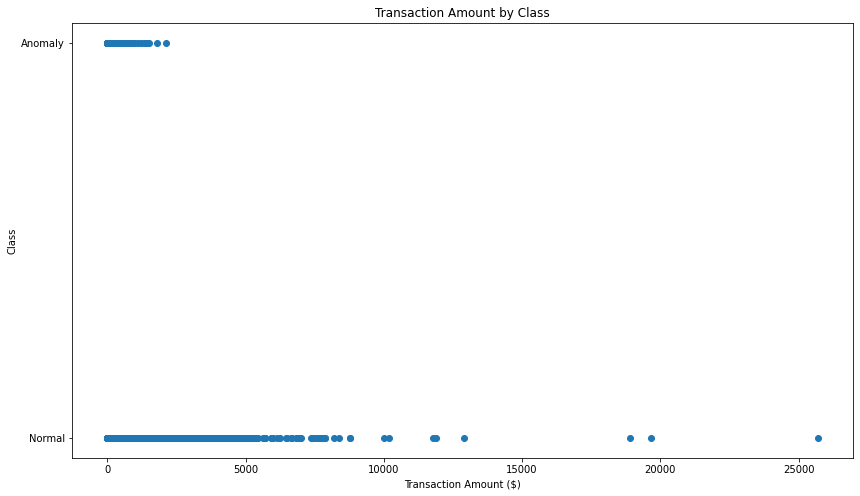

In [15]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amount by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amount ($)")
plt.show()

# 정상 데이터에 대규모 아웃라이어 존재

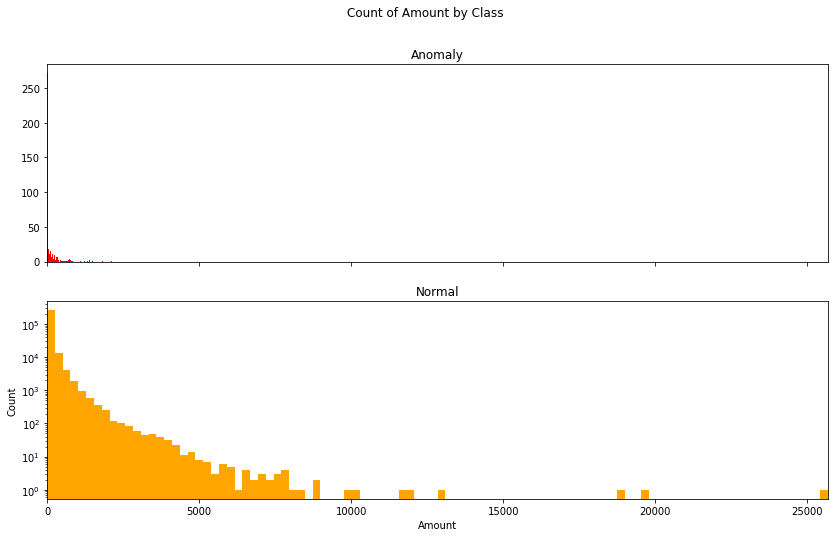

In [16]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

# 정상 데이터의 아웃라이어와 오른쪽 치우침을 확인할 수 있음. 이상 징후는 자세히 확인 불가

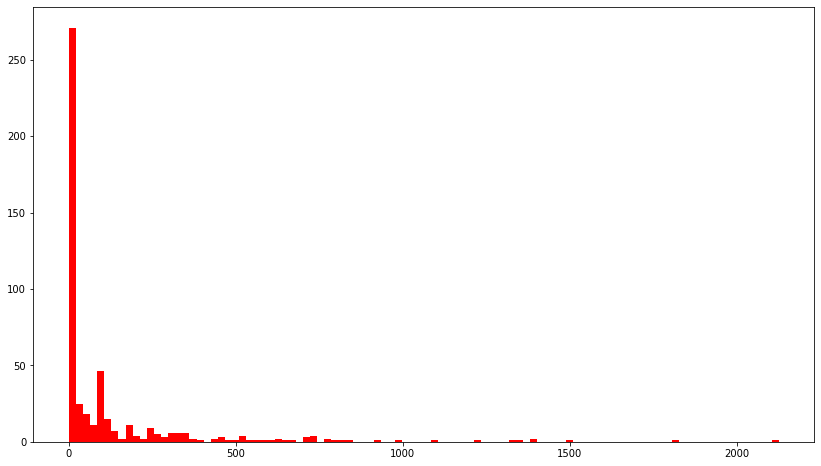

In [17]:
plt.hist(anomalies.Amount, bins=bins, color="red")
plt.show()

# 동일하게 오른쪽으로 치우쳐져있으며 더 무거움. 대부분의 부정 거래의 실제 거래금액이 상당히 작다는 의미

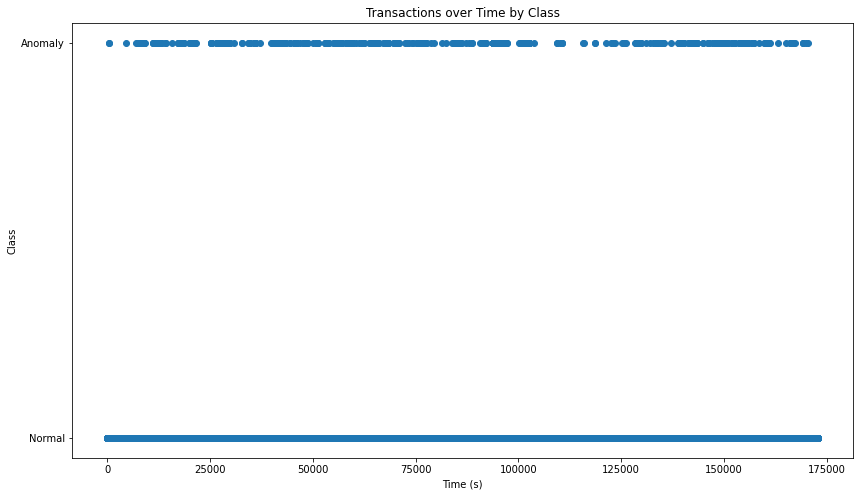

In [18]:
plt.scatter(df.Time, df.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

# 부정 거래가 전체 타임라인에 걸쳐 퍼져있음

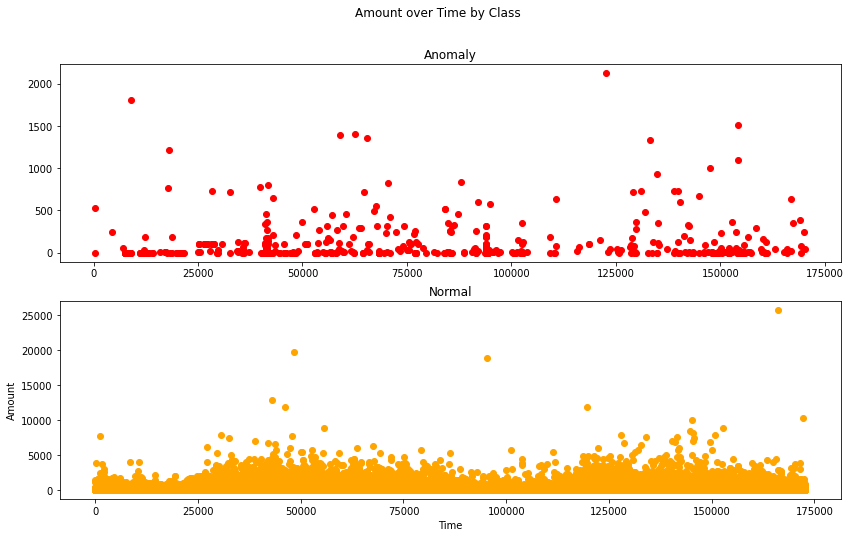

In [19]:
plot_scatter(df, "Time", "Amount")

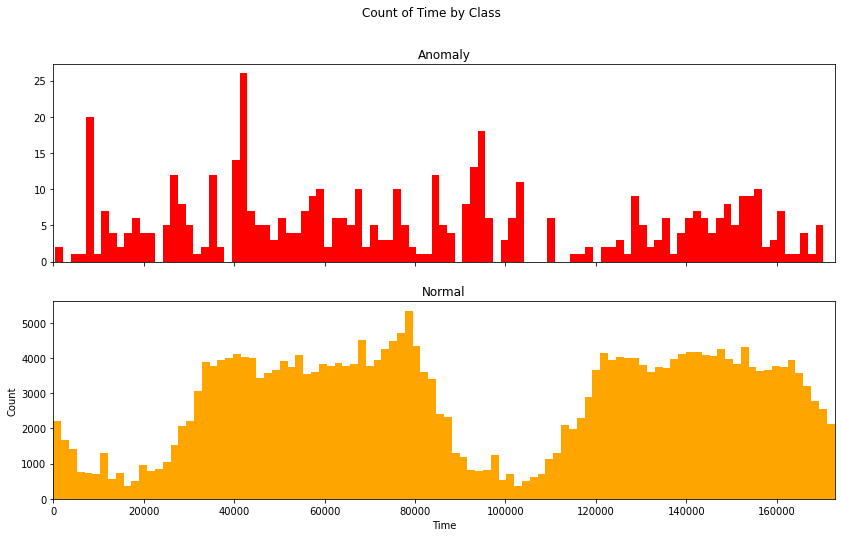

In [23]:
plot_histogram(df, bins, "Time")

# 정상 데이터는 발생 패턴이 있으나 부정거래는 특정한 패턴 없이 발생함

V1 Counts


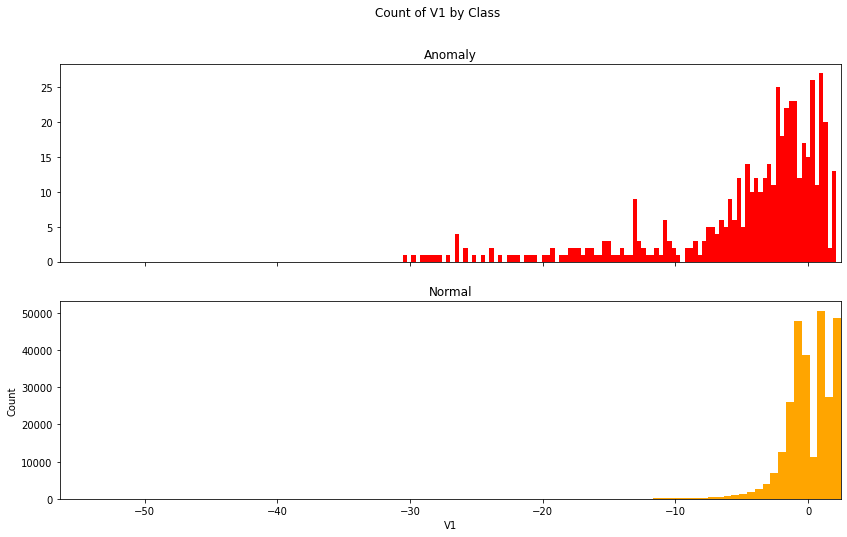

V2 Counts


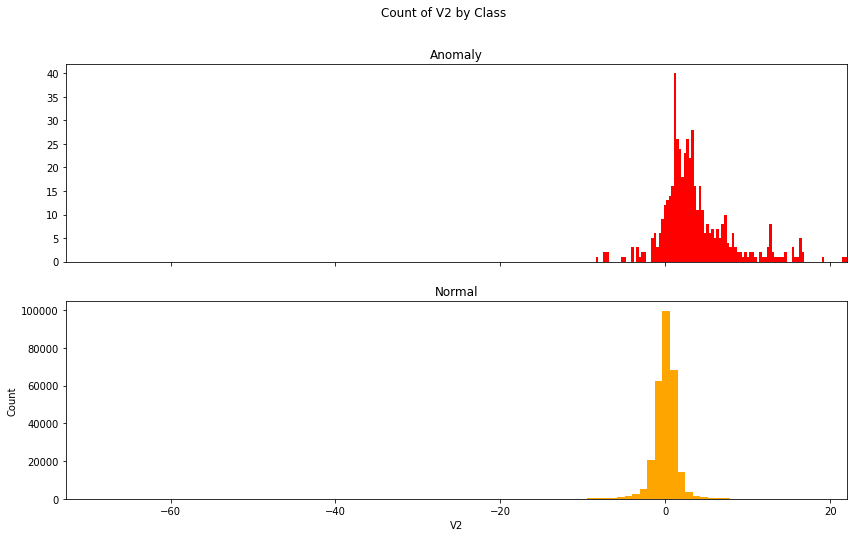

V3 Counts


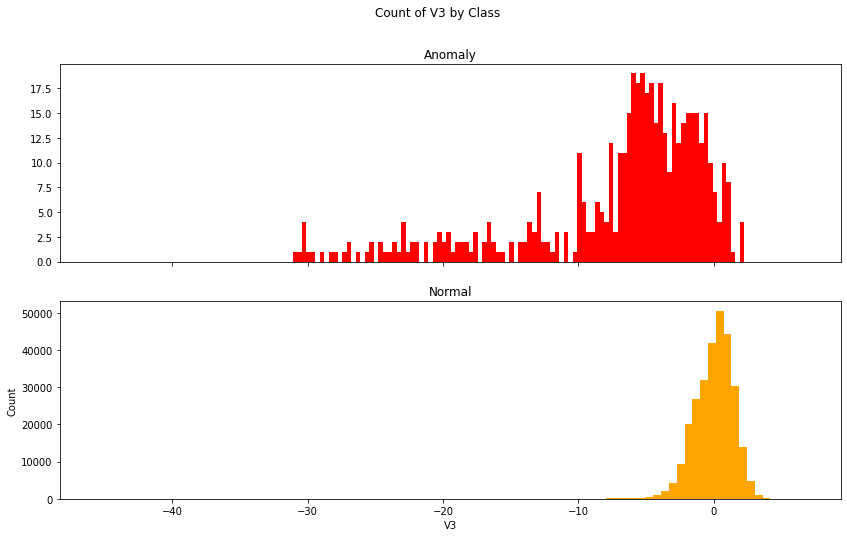

V4 Counts


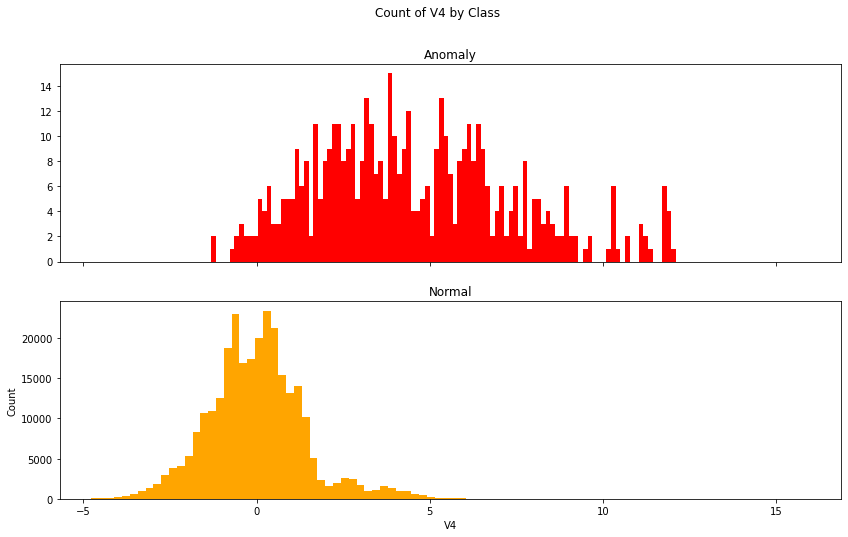

V5 Counts


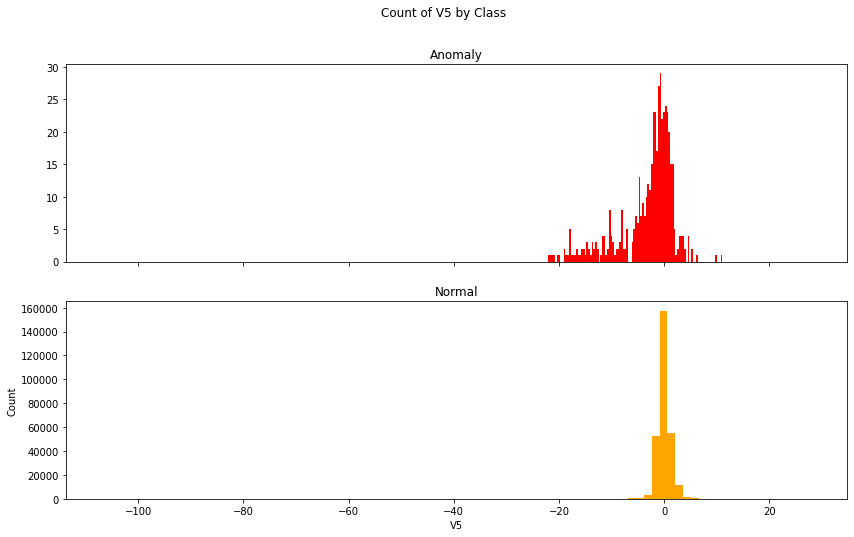

V6 Counts


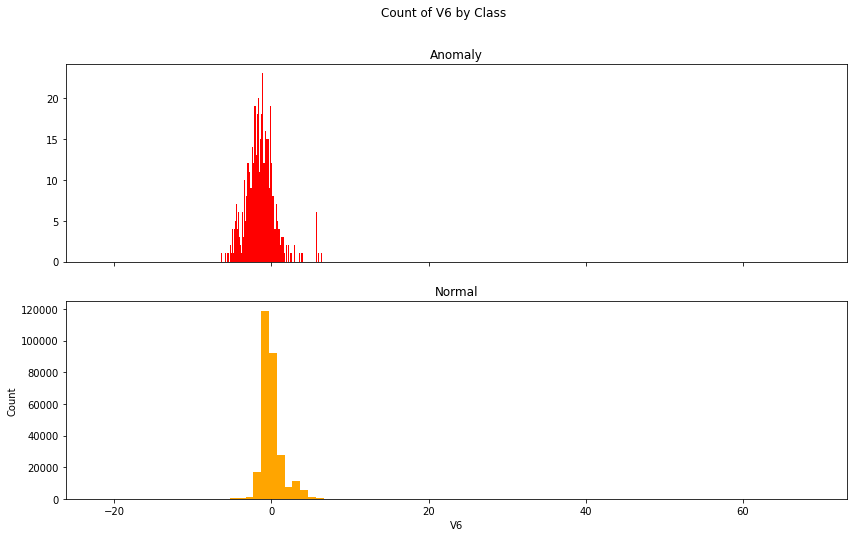

V7 Counts


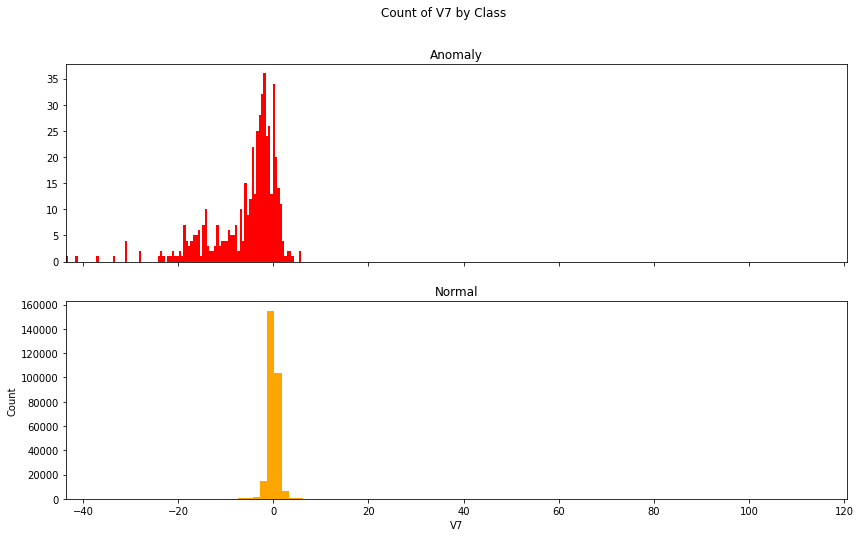

V8 Counts


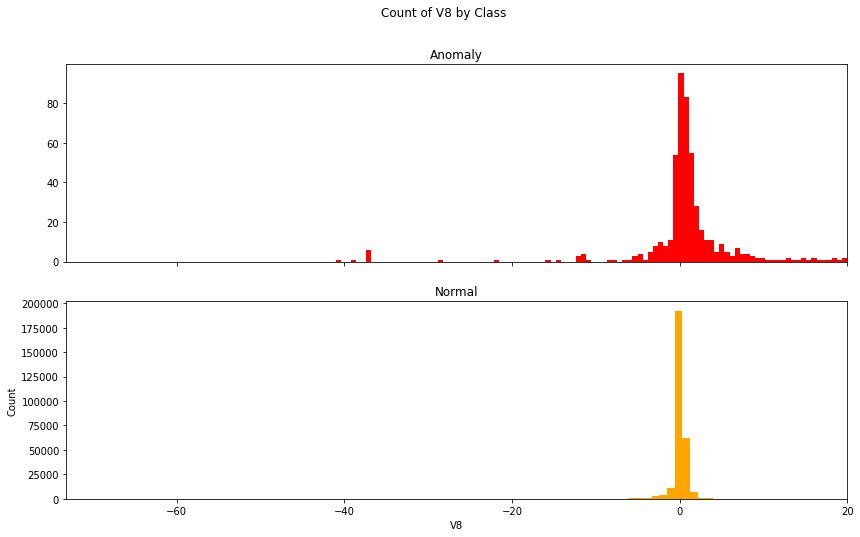

V9 Counts


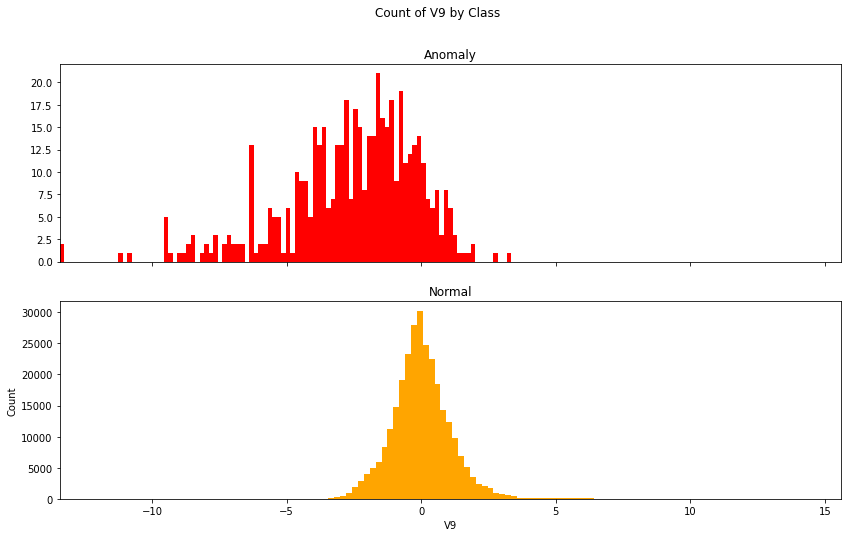

V10 Counts


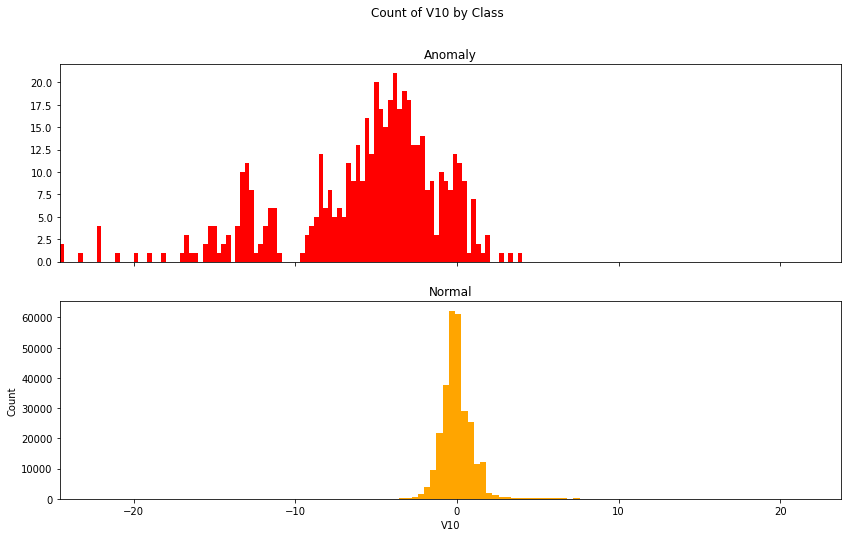

V11 Counts


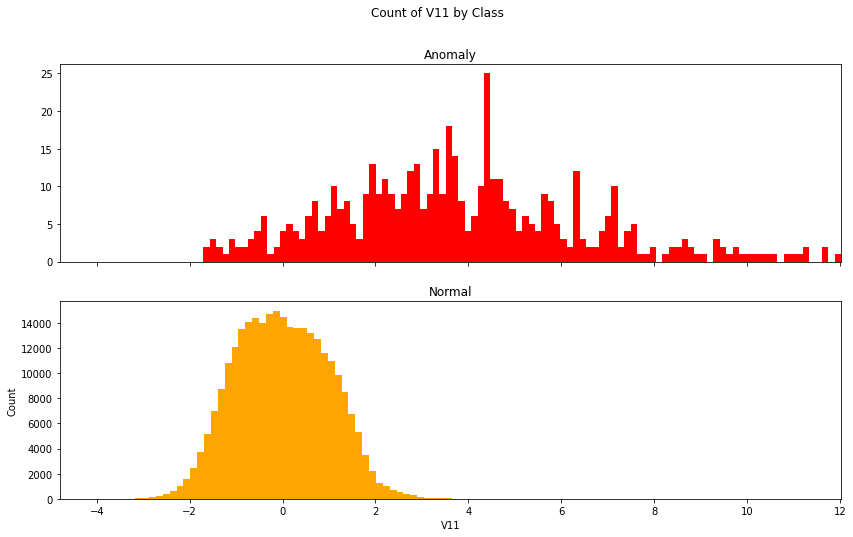

V12 Counts


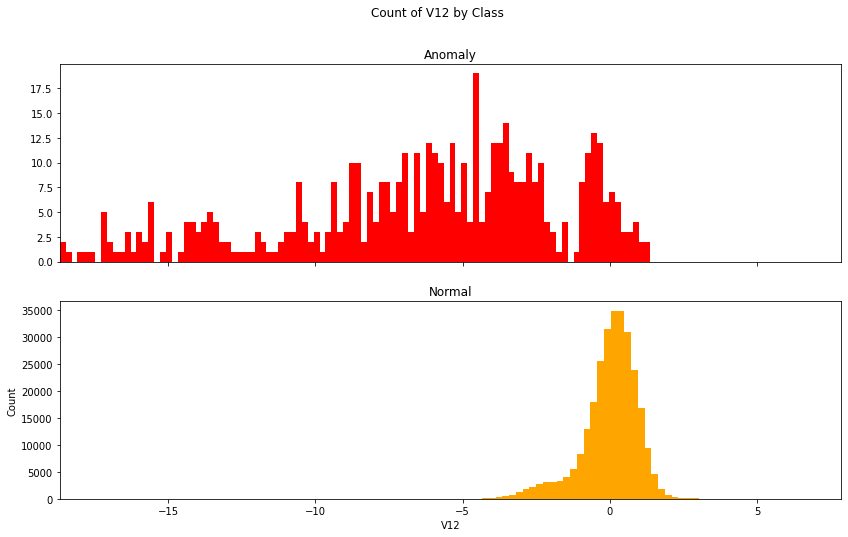

V13 Counts


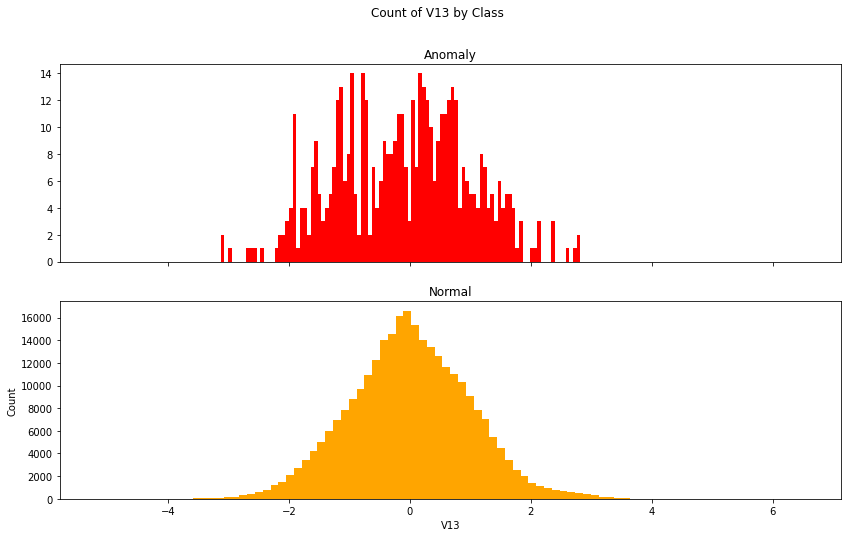

V14 Counts


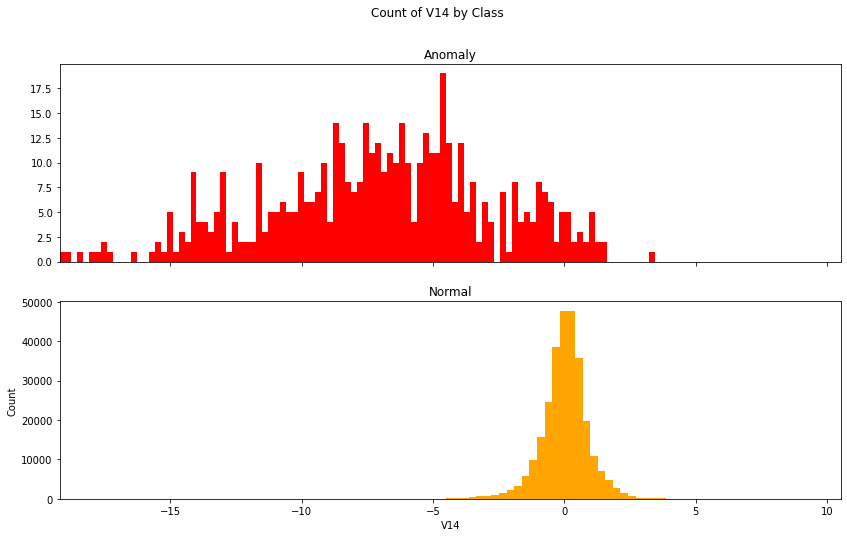

V15 Counts


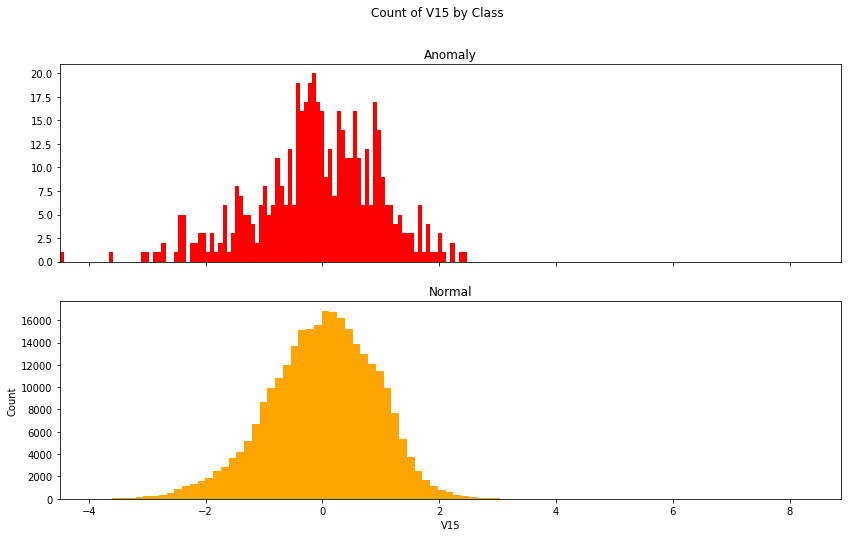

V16 Counts


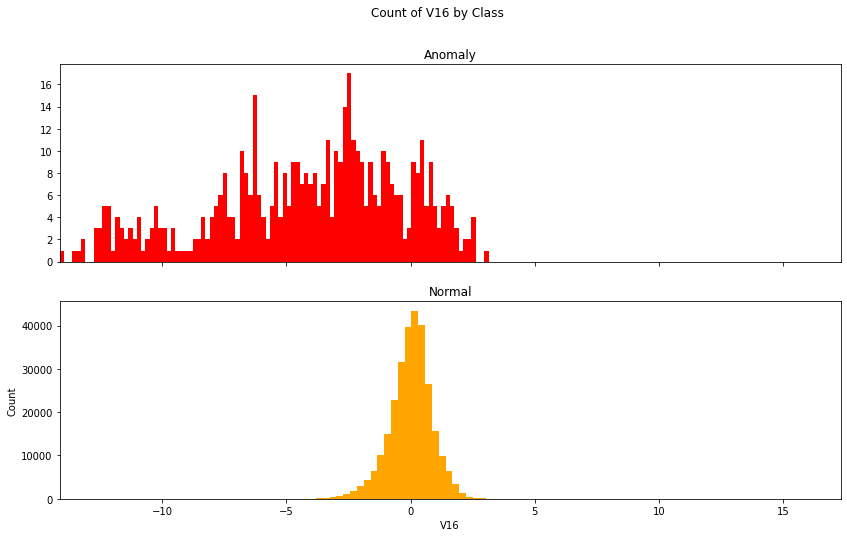

V17 Counts


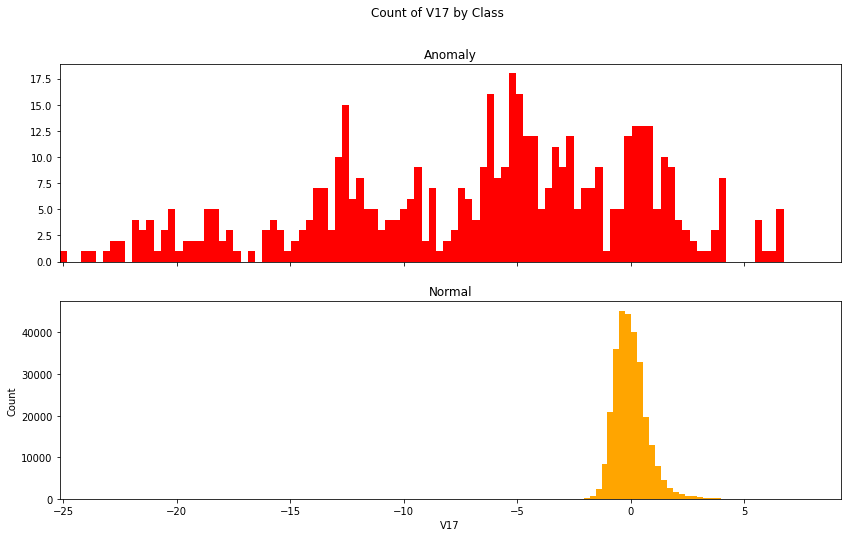

V18 Counts


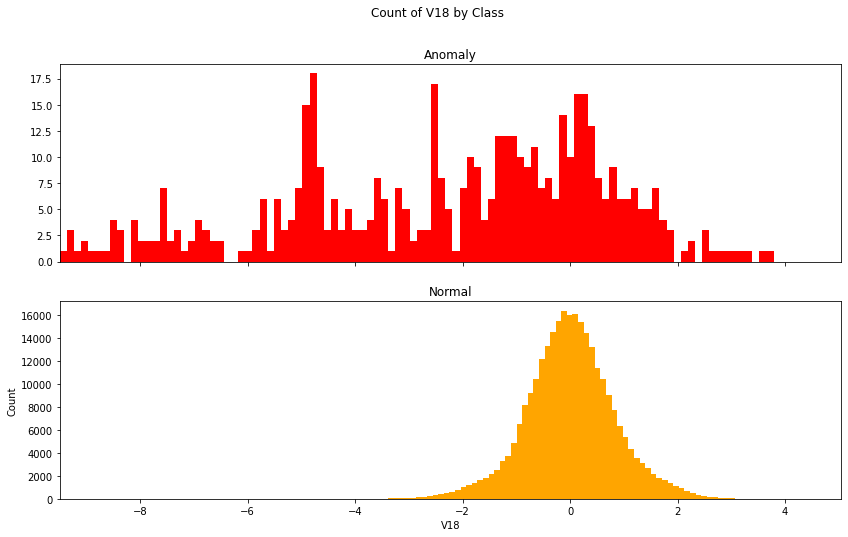

V19 Counts


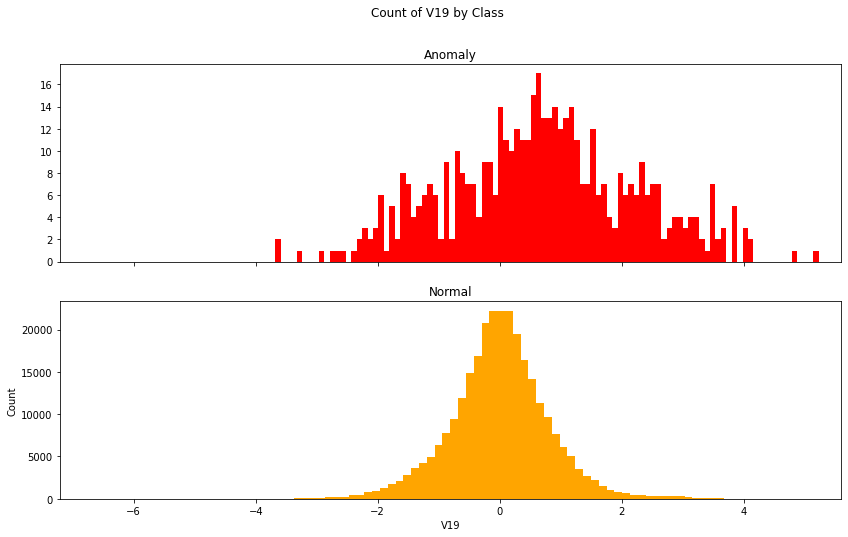

V20 Counts


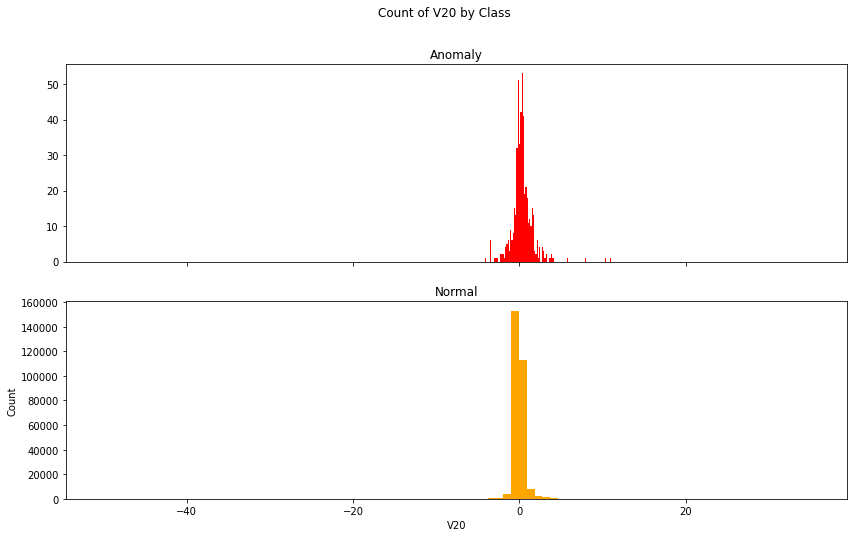

V21 Counts


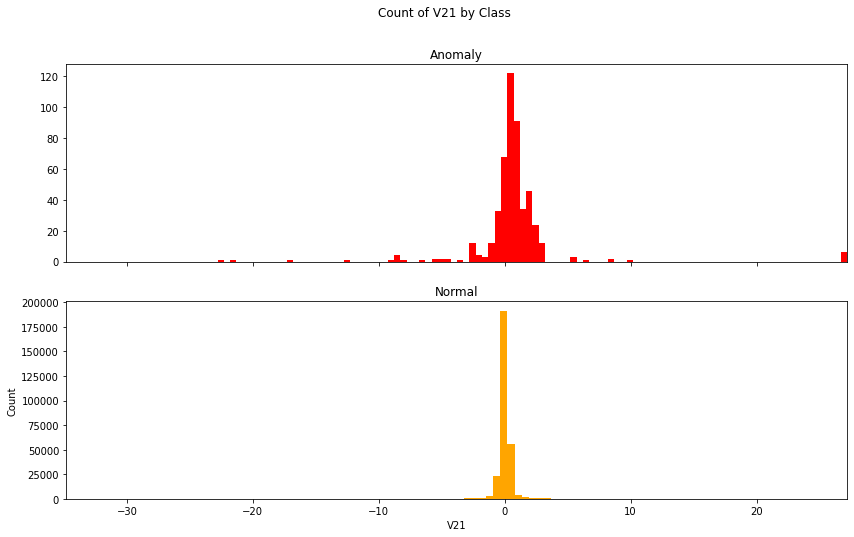

V22 Counts


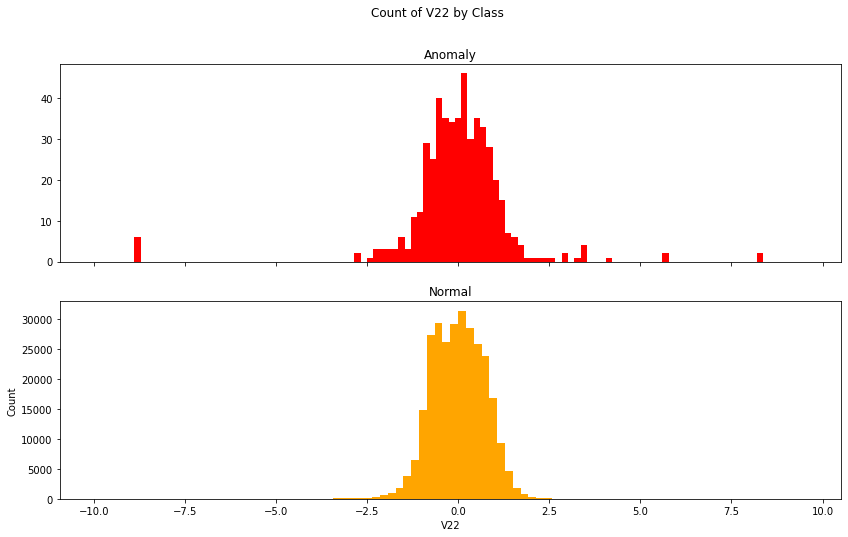

V23 Counts


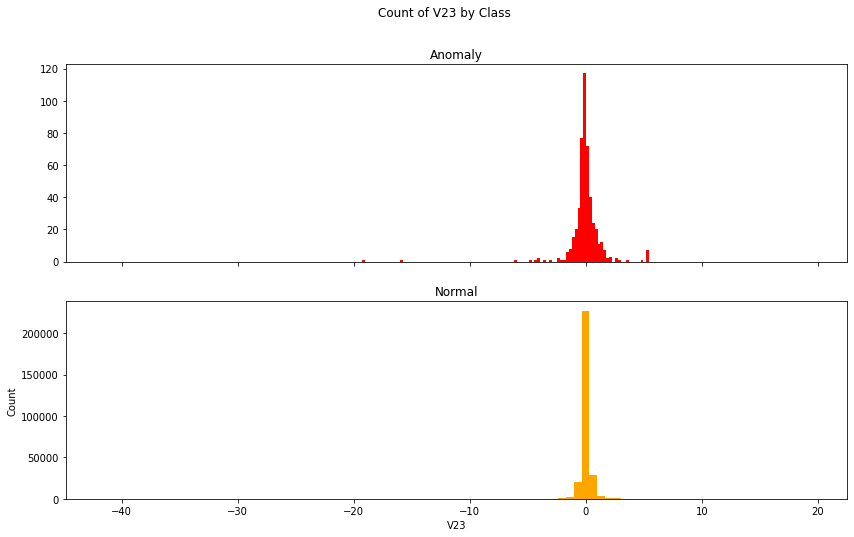

V24 Counts


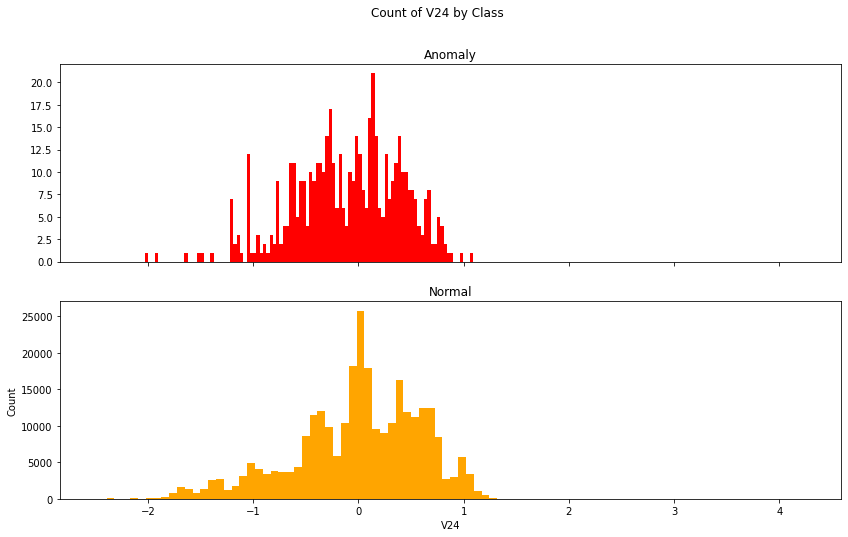

V25 Counts


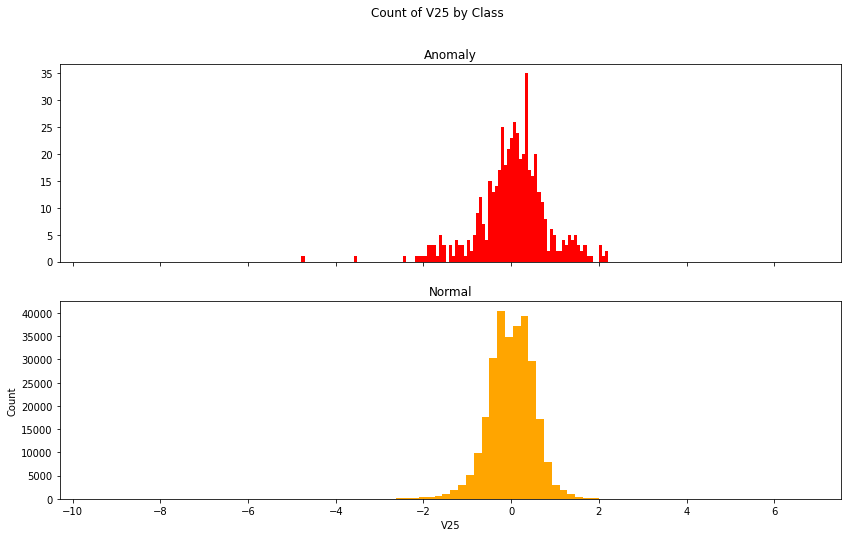

V26 Counts


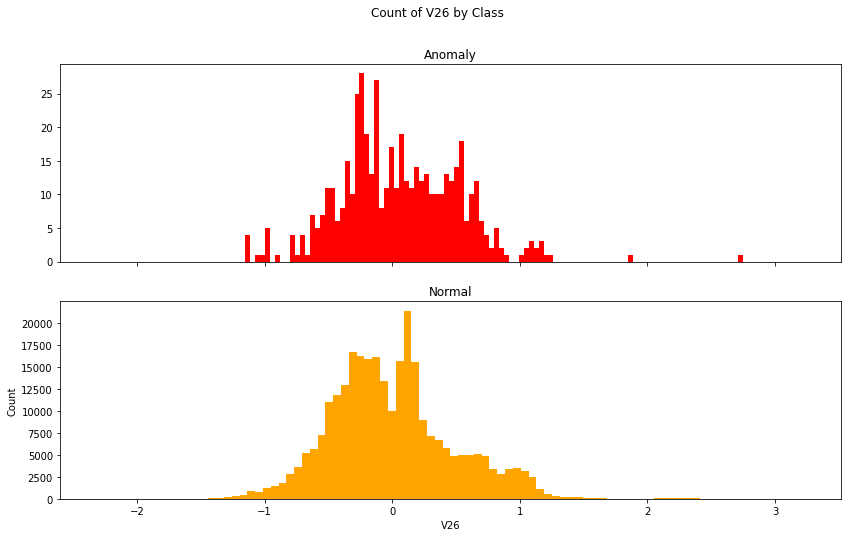

V27 Counts


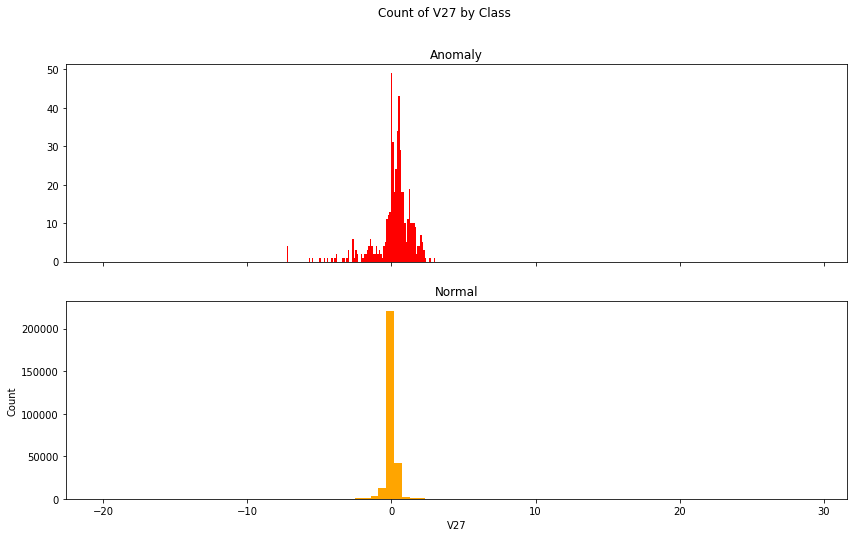

V28 Counts


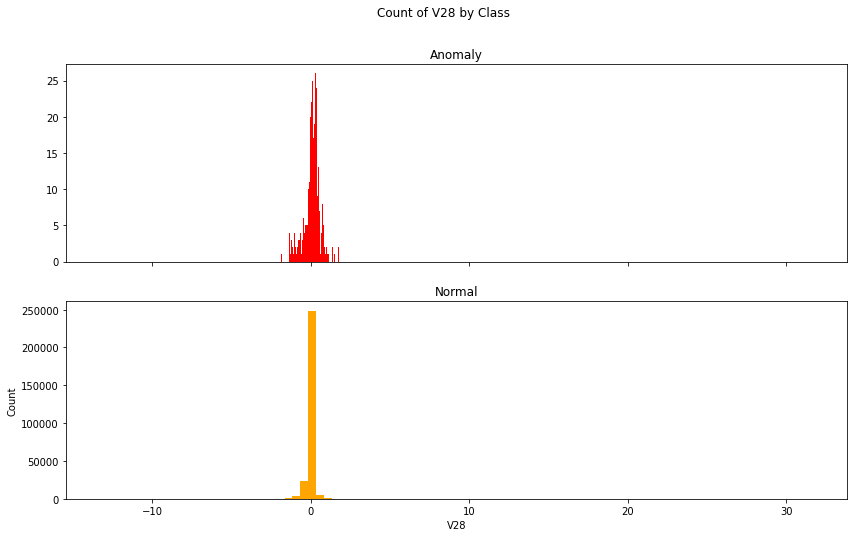

In [25]:
for f in range(1, 29):
    print(f"V{f} Counts")
    plot_histogram(df, bins, f'V{f}')

# 빈도수를 시각화했을 때, 일반적으로 정상 데이터가 균일한 분포를 보이는데 반해 부정 데이터는 분산과 편차가 큼

V1 vs Time


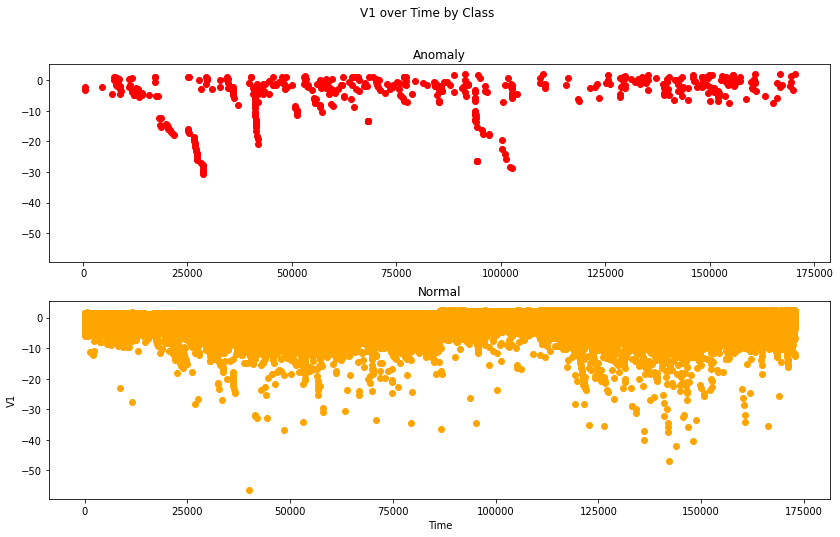

V2 vs Time


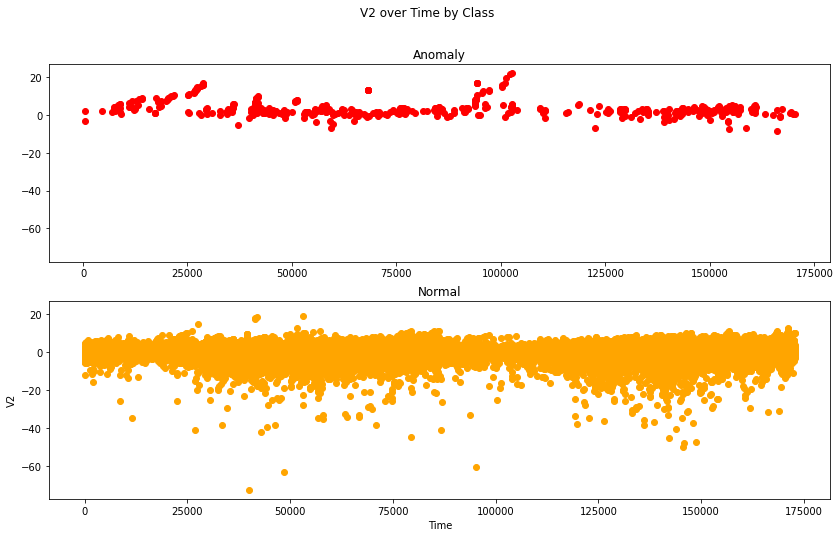

V3 vs Time


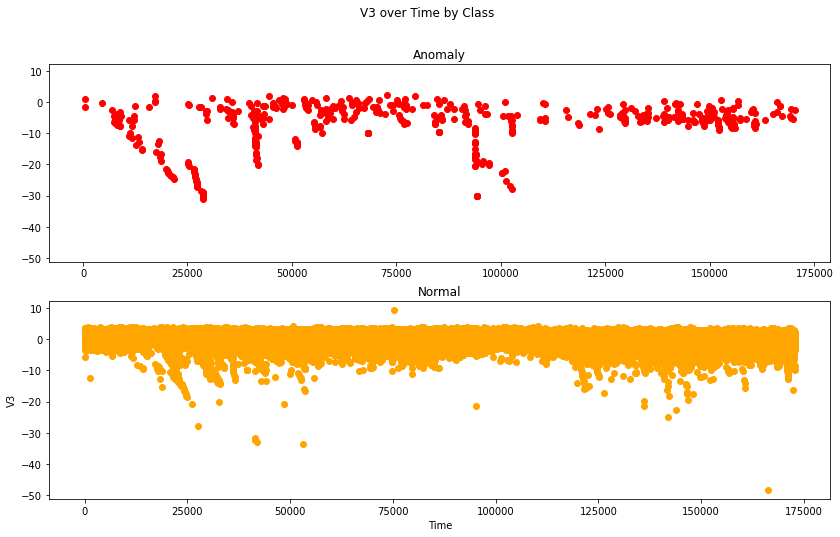

V4 vs Time


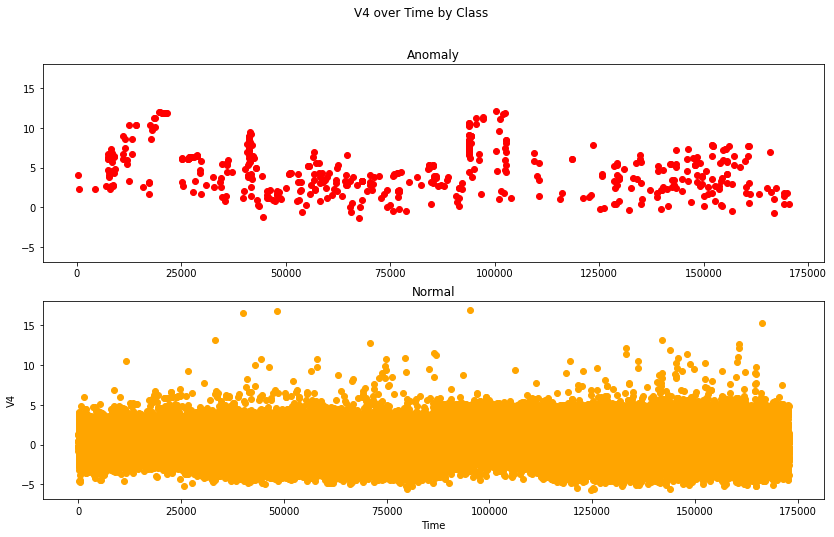

V5 vs Time


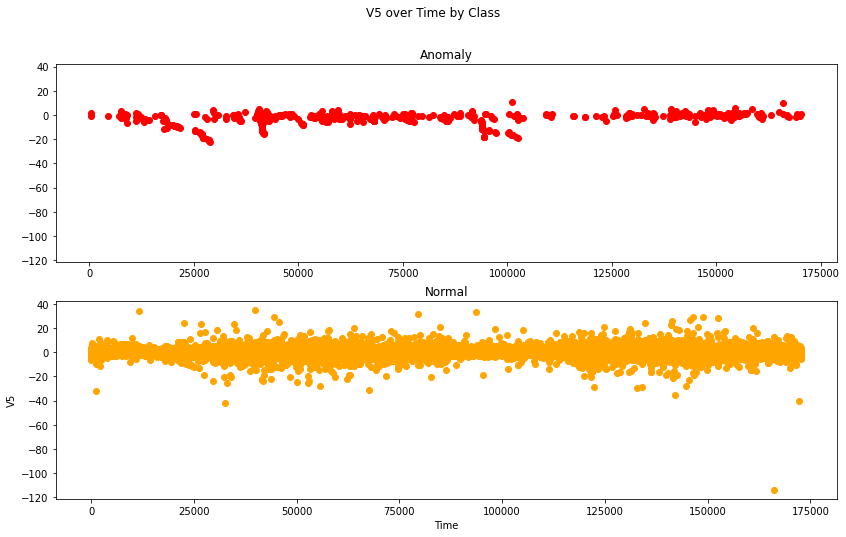

V6 vs Time


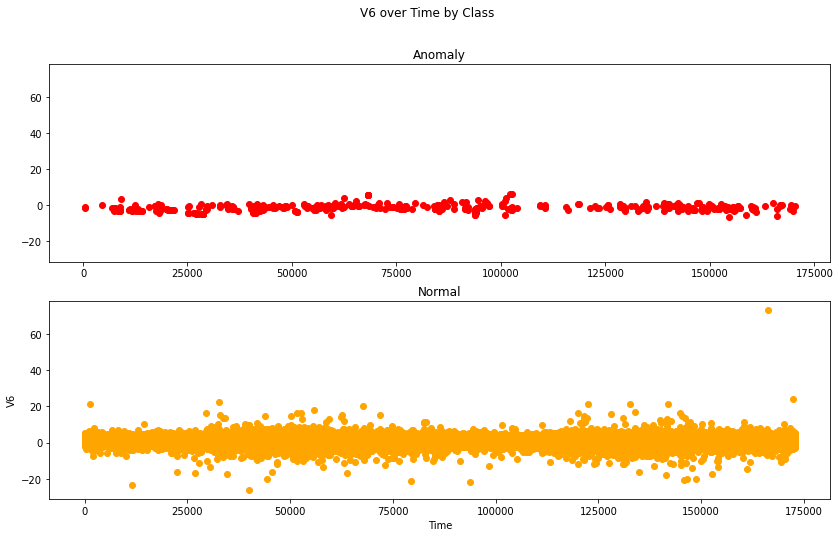

V7 vs Time


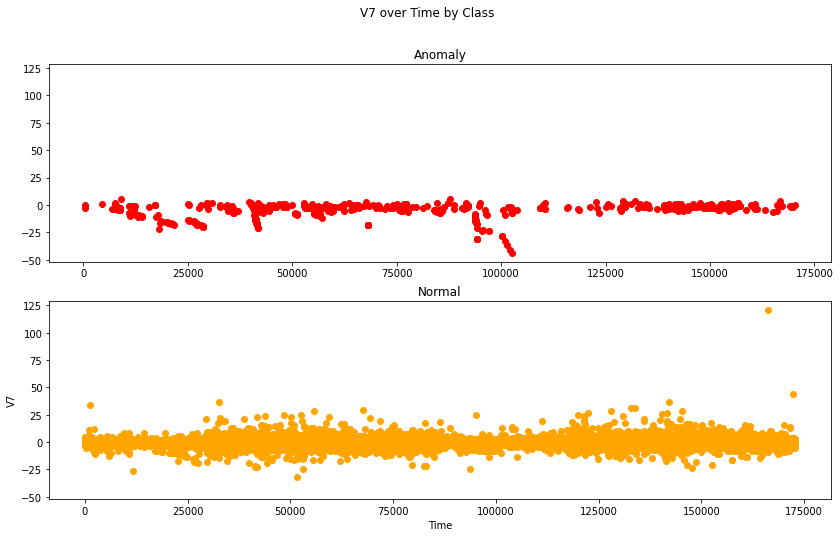

V8 vs Time


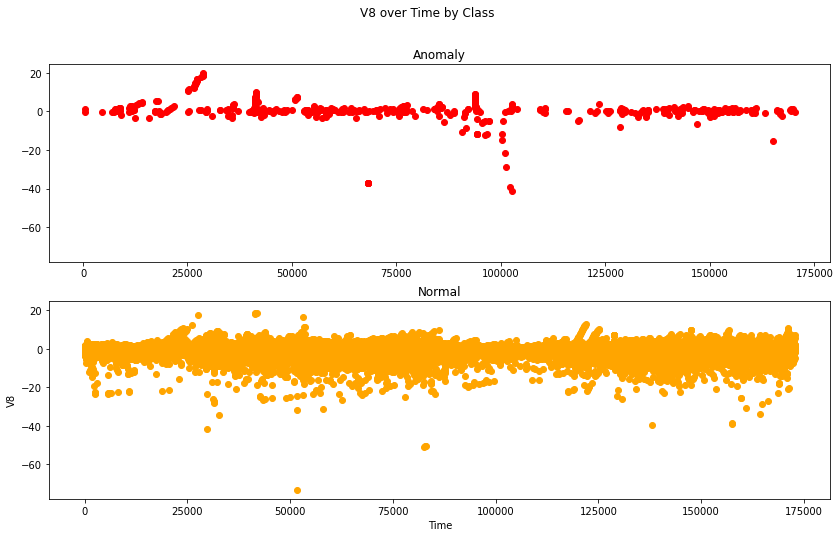

V9 vs Time


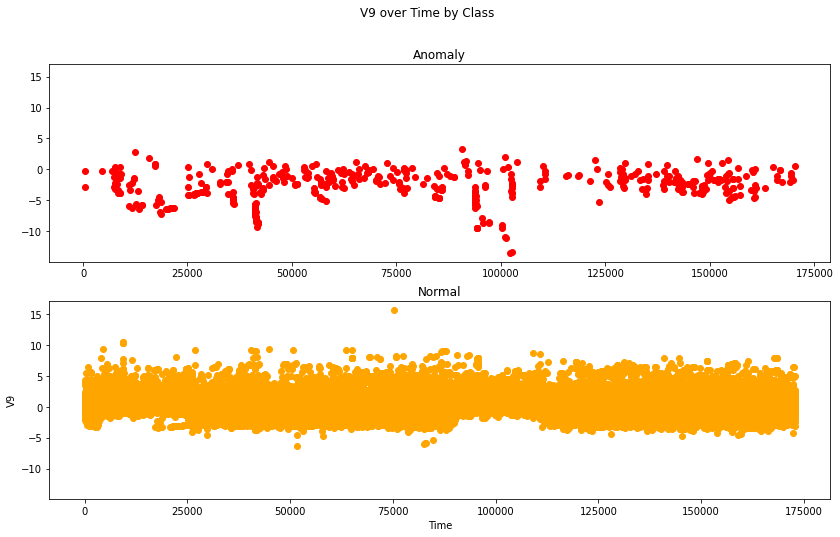

V10 vs Time


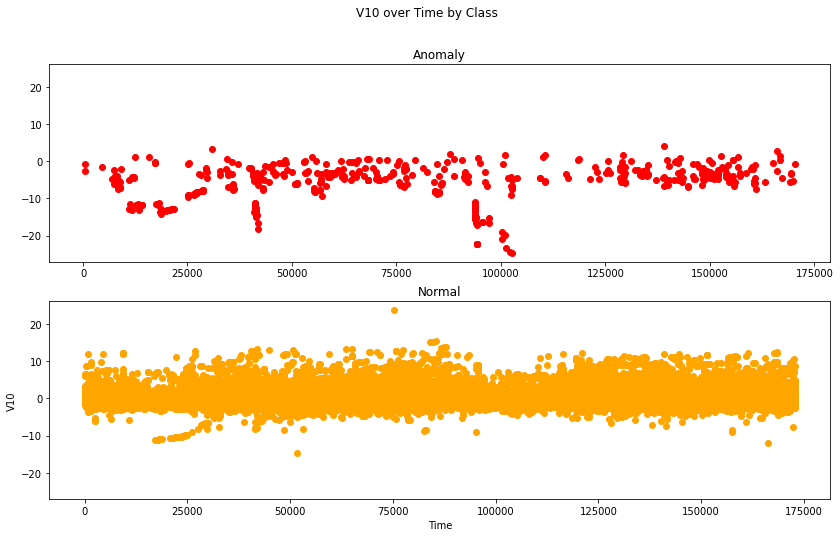

V11 vs Time


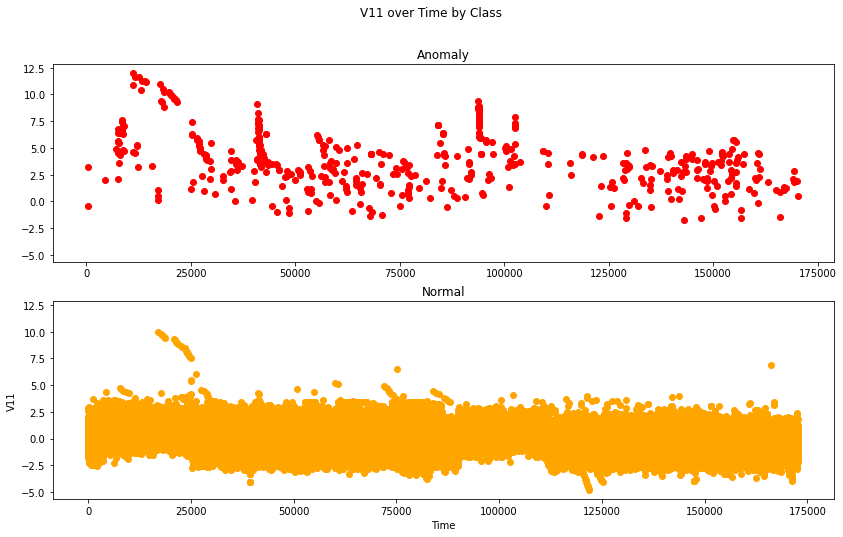

V12 vs Time


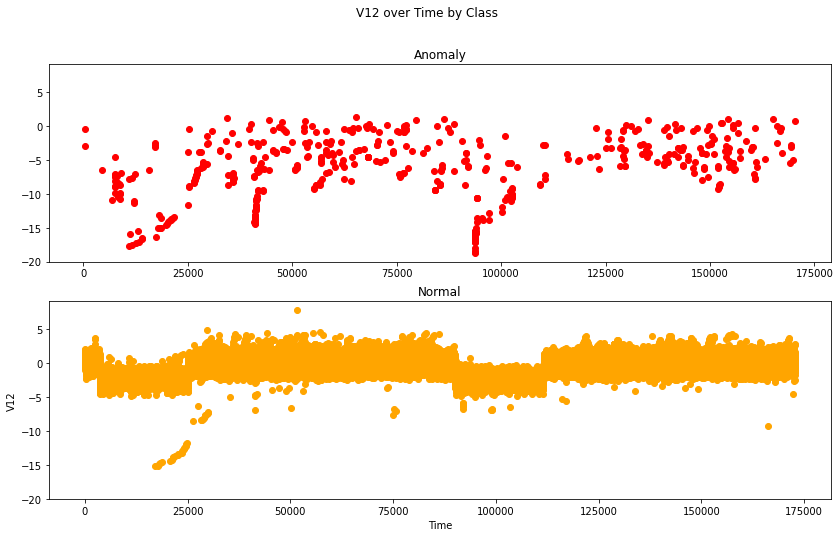

V13 vs Time


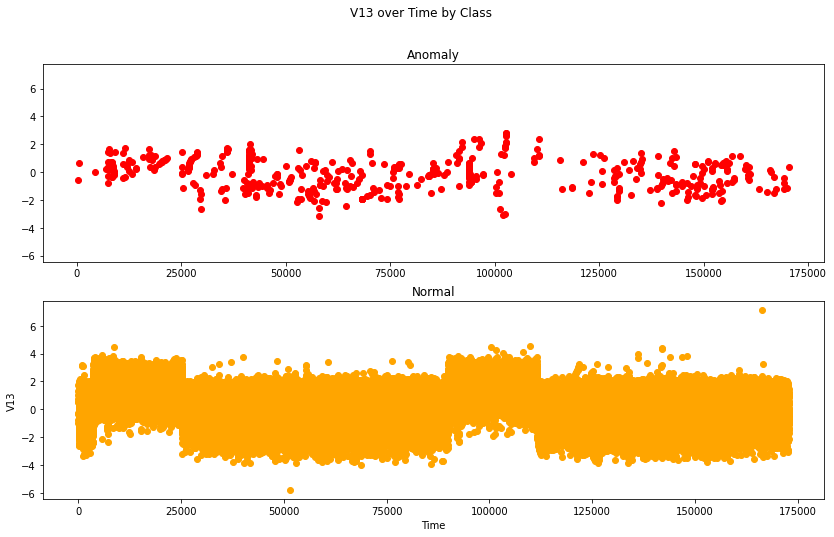

V14 vs Time


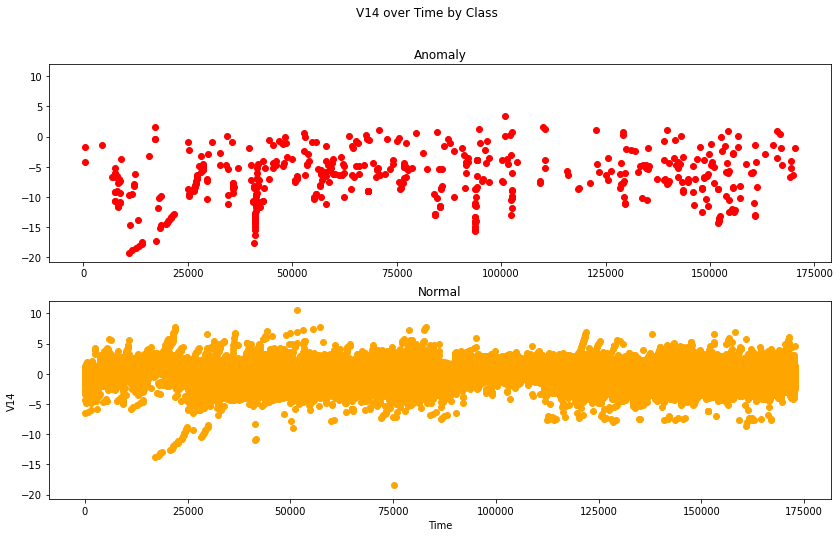

V15 vs Time


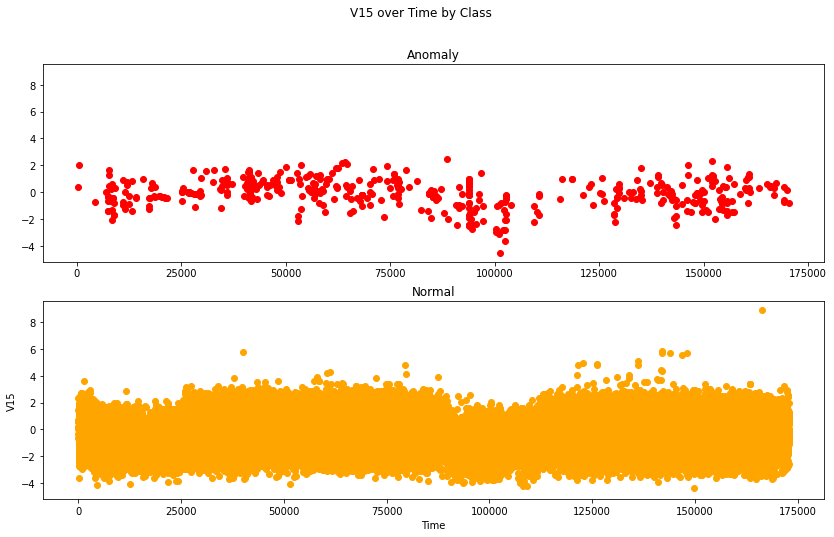

V16 vs Time


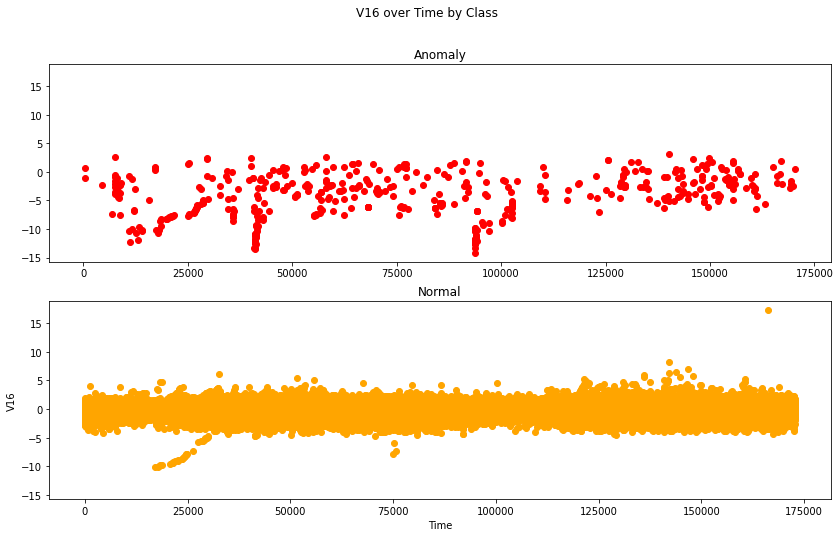

V17 vs Time


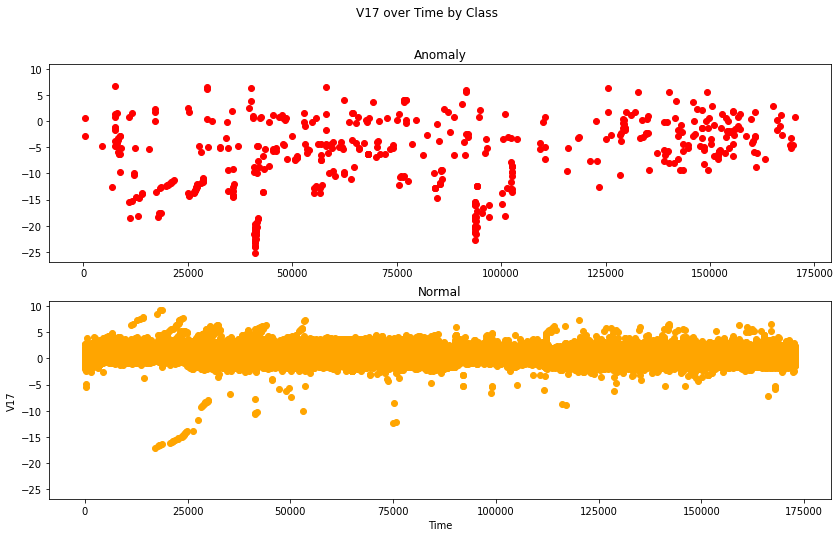

V18 vs Time


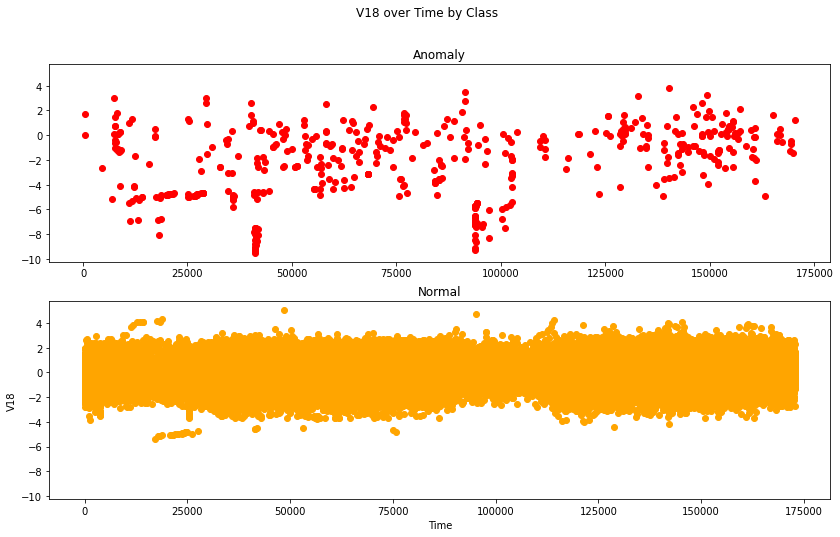

V19 vs Time


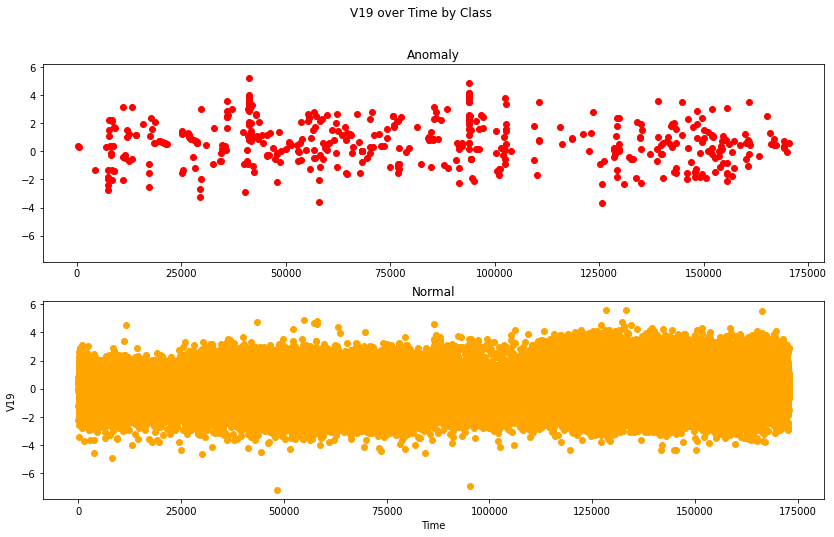

V20 vs Time


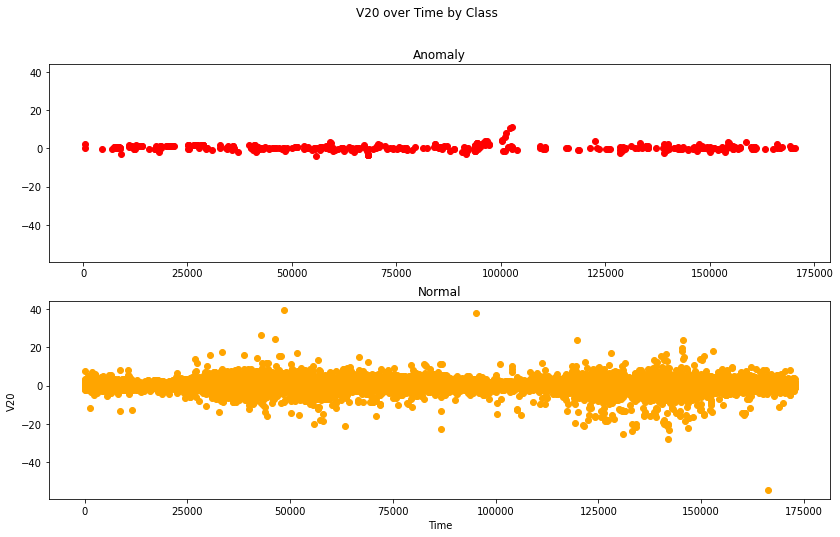

V21 vs Time


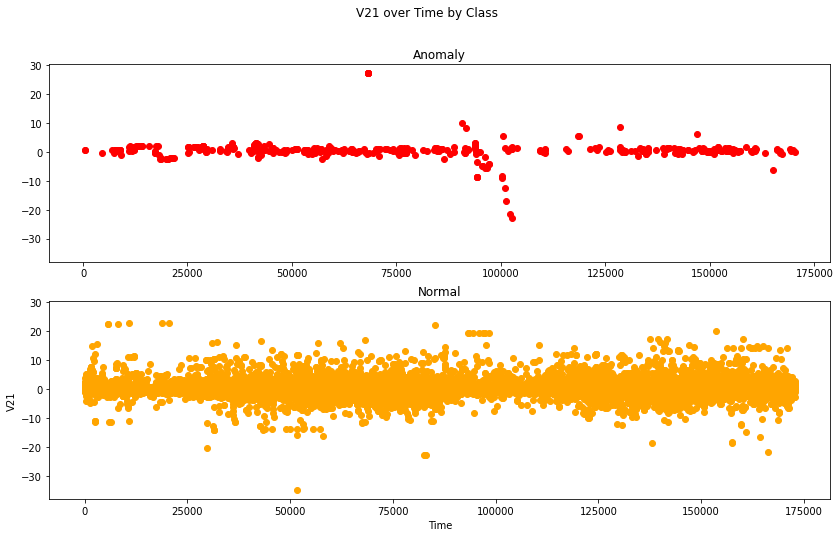

V22 vs Time


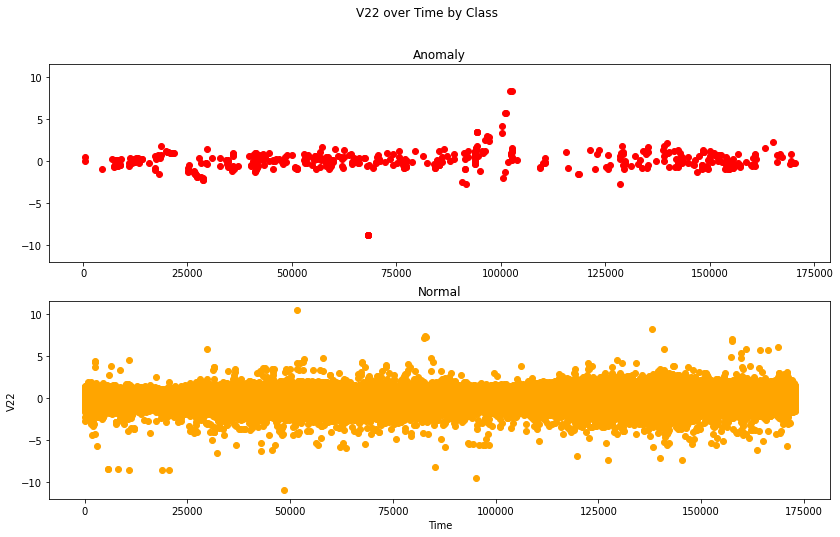

V23 vs Time


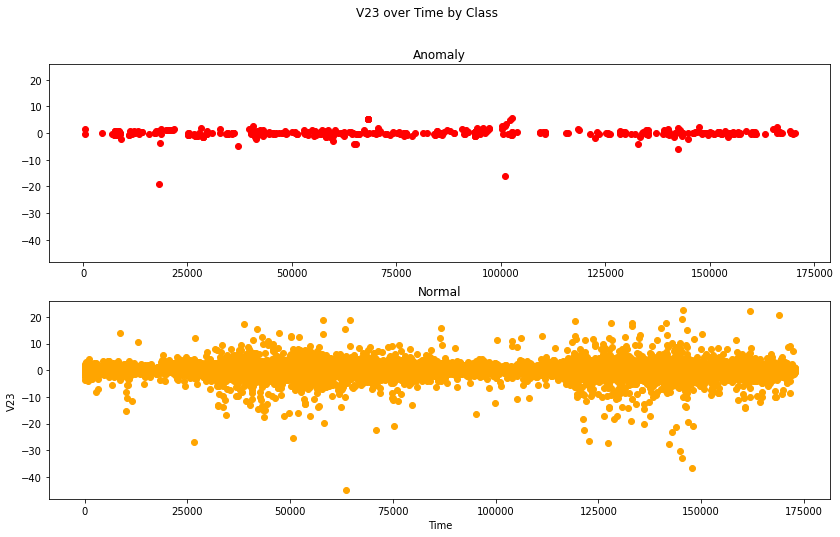

V24 vs Time


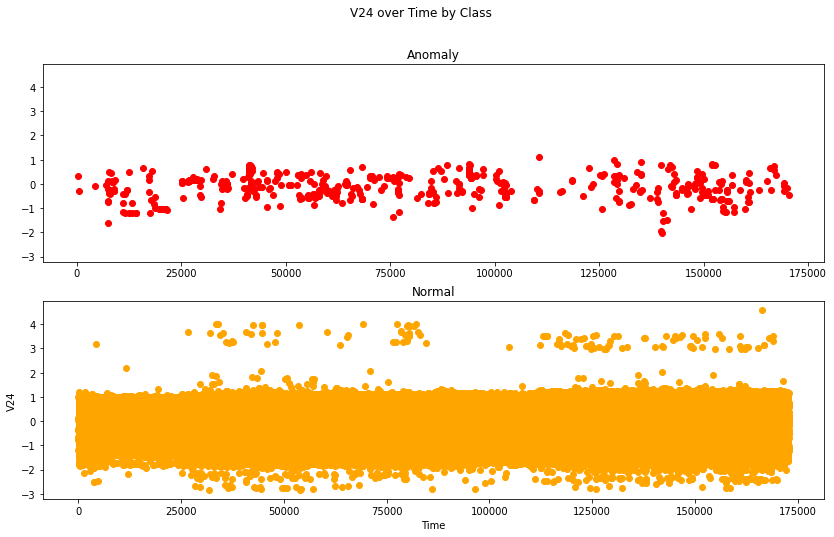

V25 vs Time


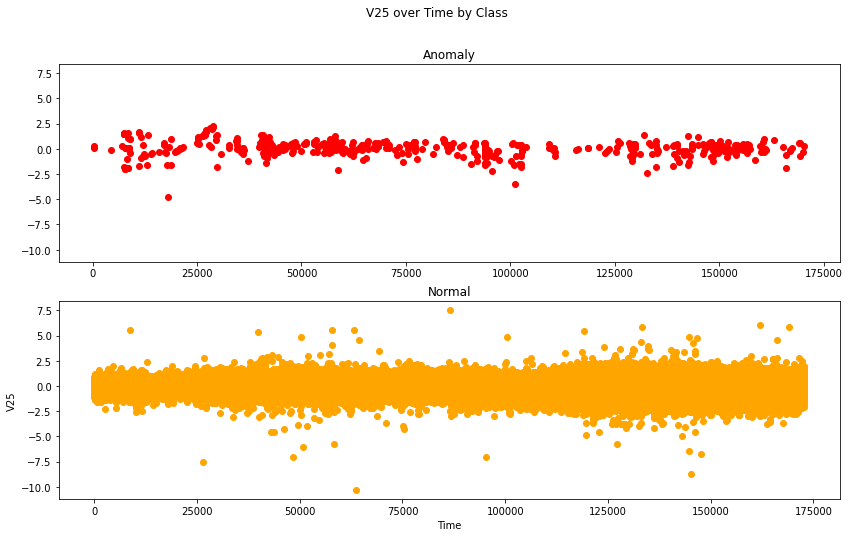

V26 vs Time


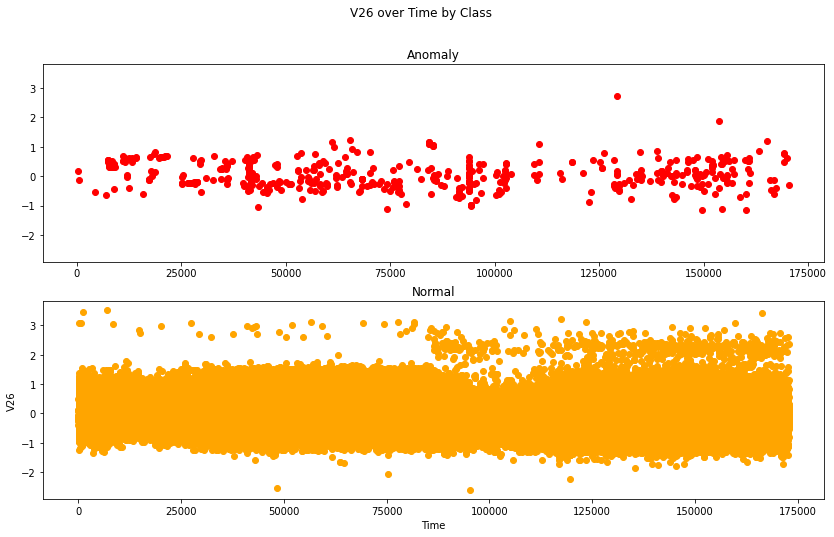

V27 vs Time


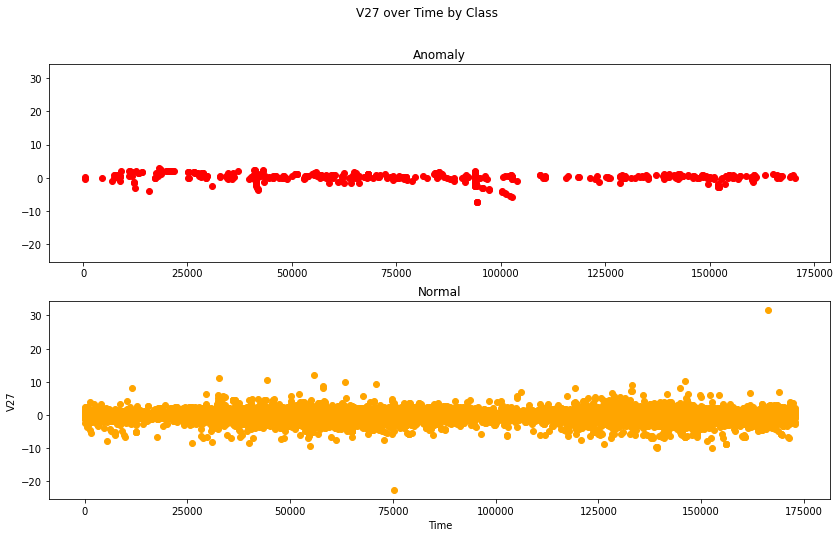

V28 vs Time


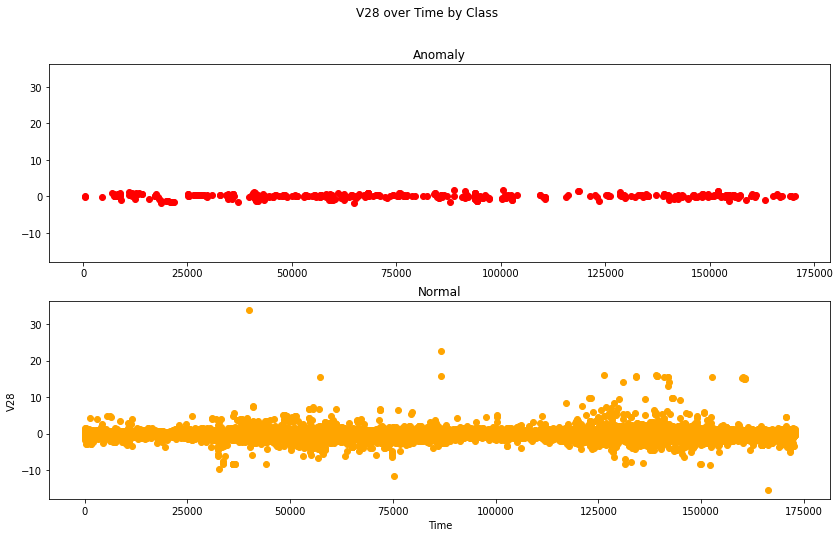

In [27]:
for f in range(1, 29):
    print(f"V{f} vs Time")
    plot_scatter(df, "Time", f'V{f}', sharey=True)

# 시간에 따른 데이터를 시각화하였을 때, 부정 데이터의 대부분이 정상 데이터의 대역폭에 포함되어있지만 벗어나 있는 데이터도 많음

Amount vs V1


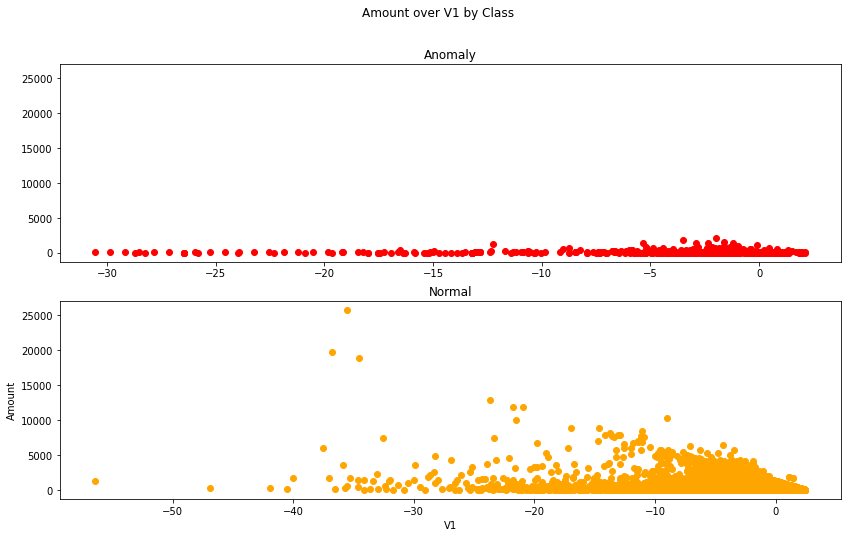

Amount vs V2


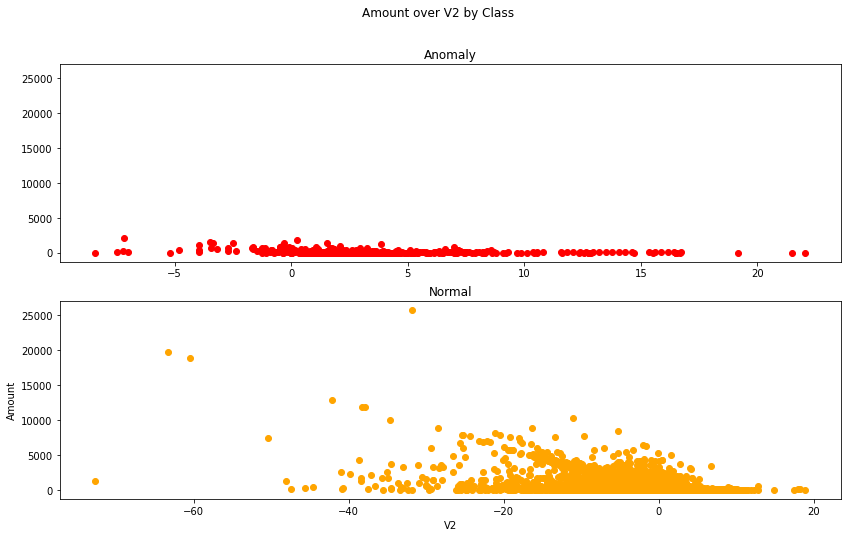

Amount vs V3


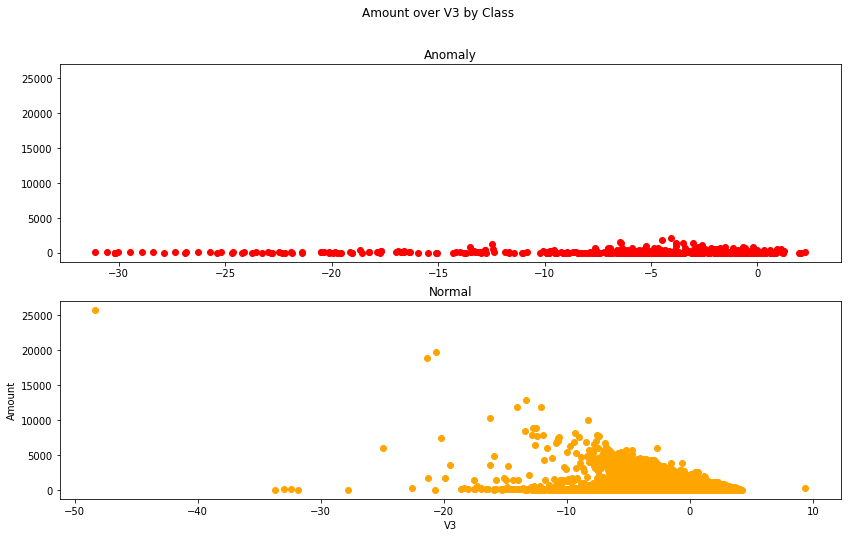

Amount vs V4


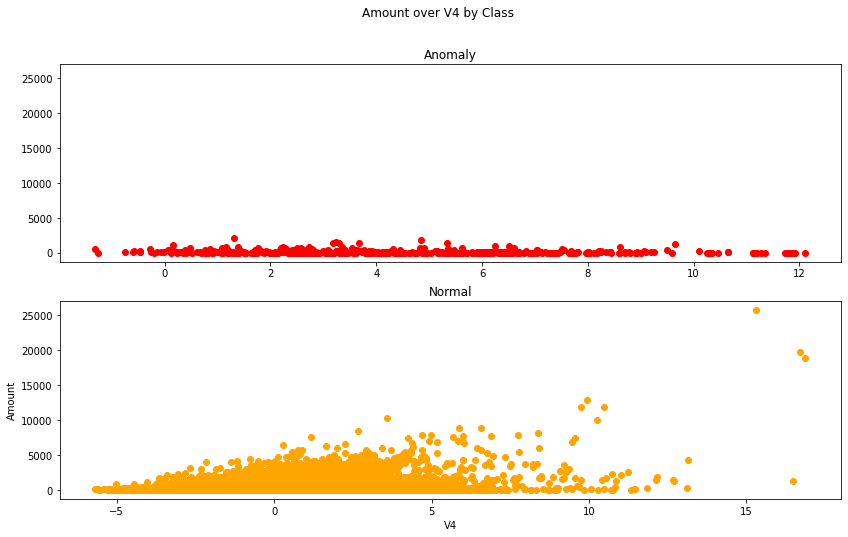

Amount vs V5


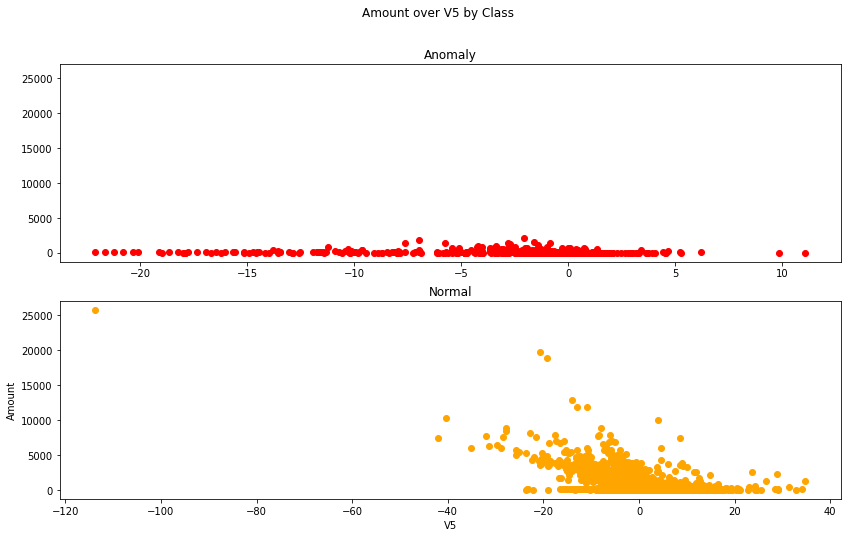

Amount vs V6


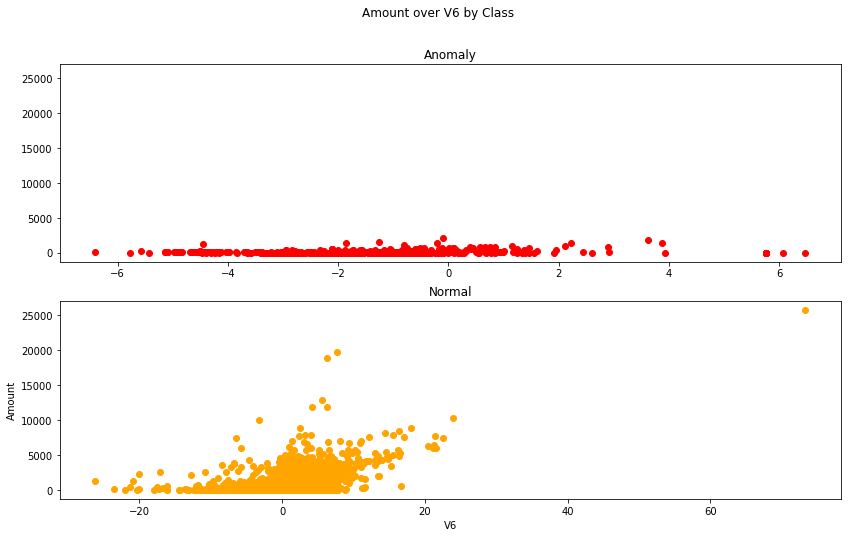

Amount vs V7


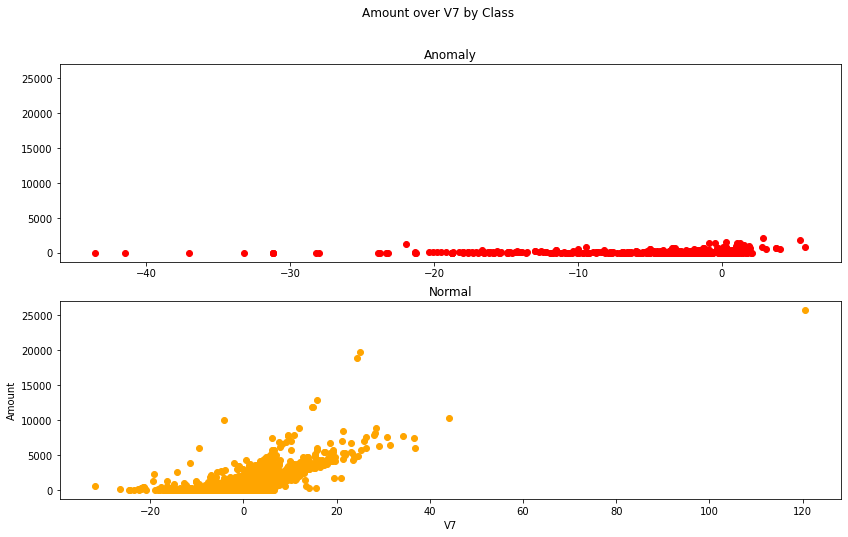

Amount vs V8


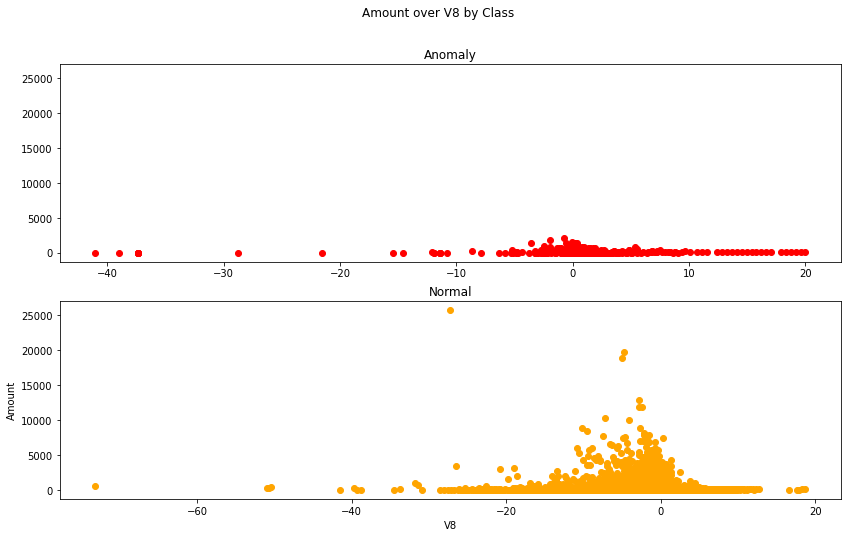

Amount vs V9


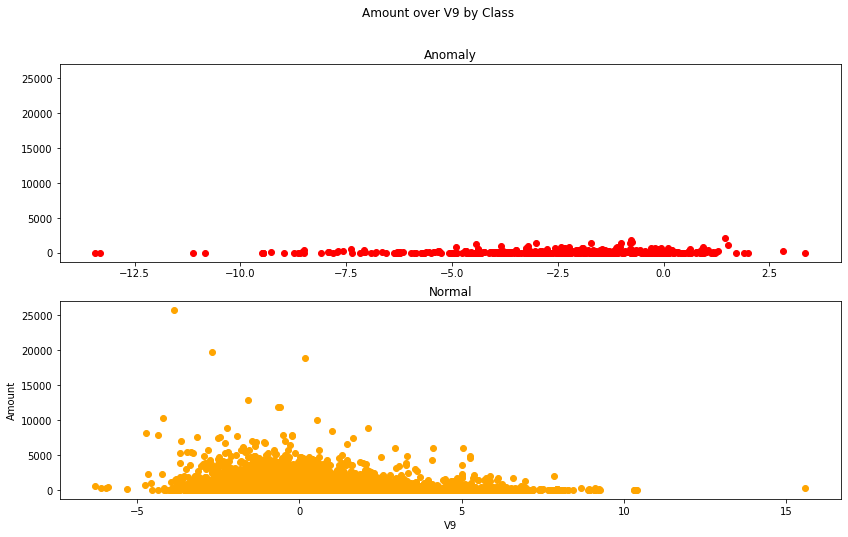

Amount vs V10


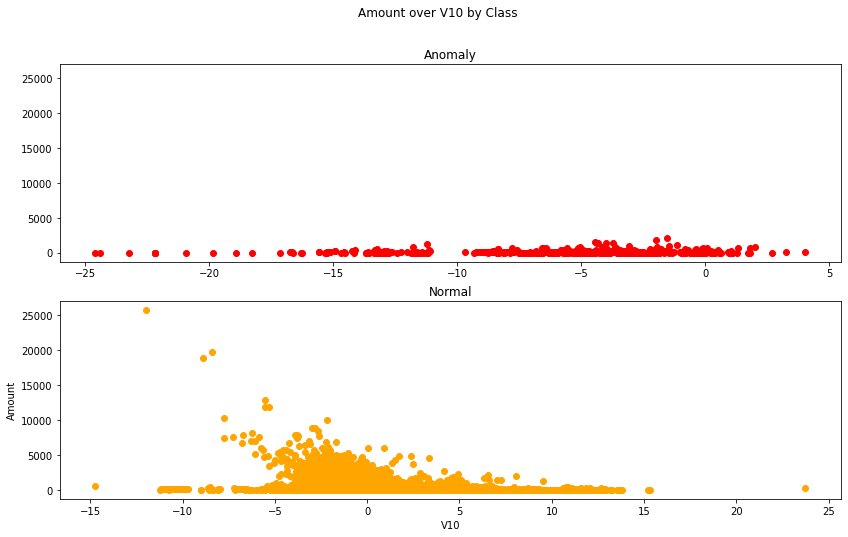

Amount vs V11


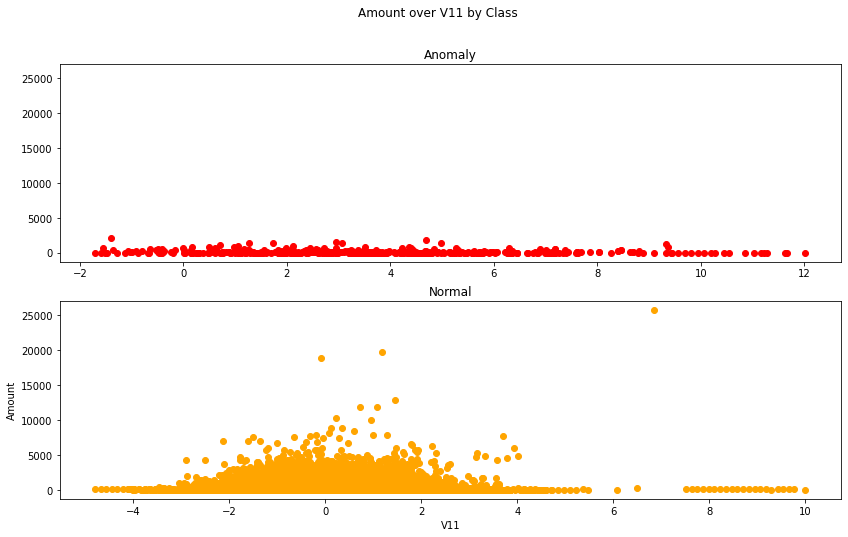

Amount vs V12


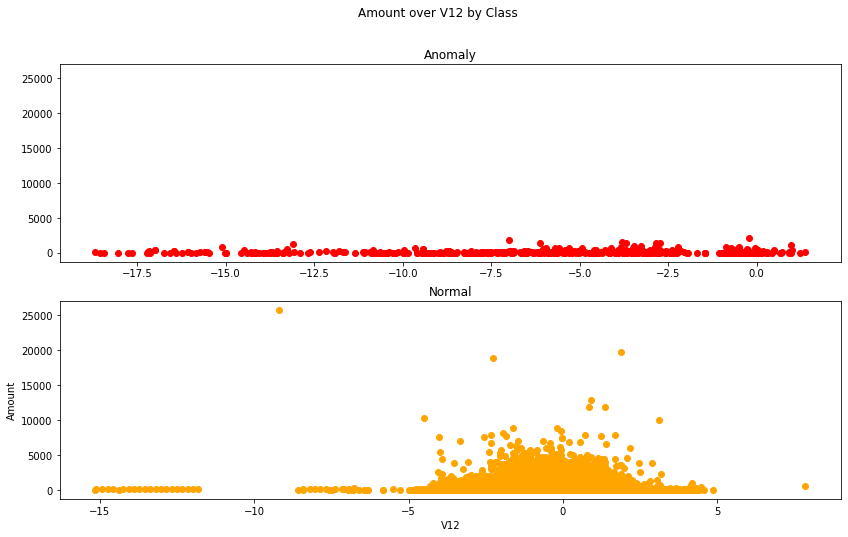

Amount vs V13


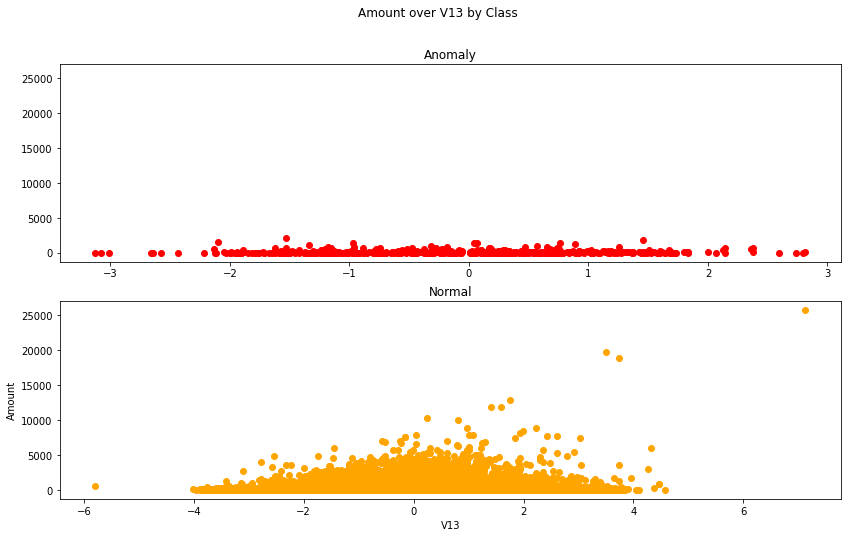

Amount vs V14


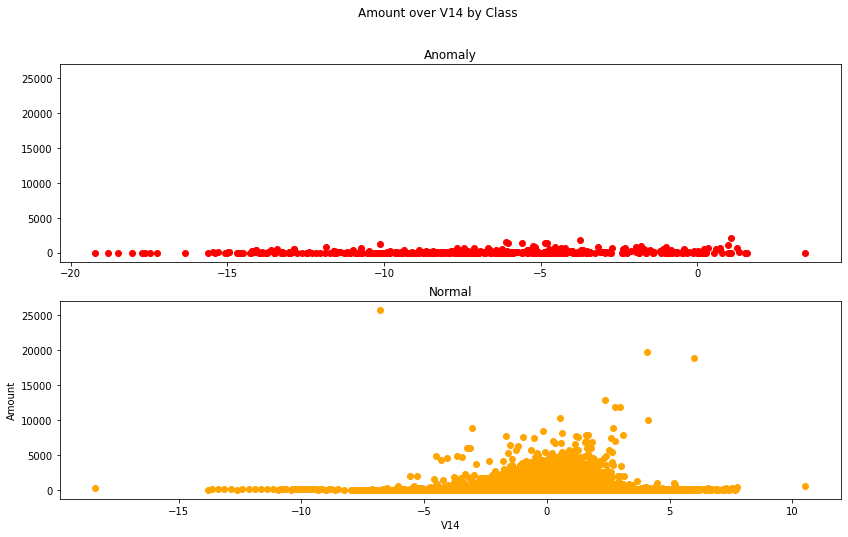

Amount vs V15


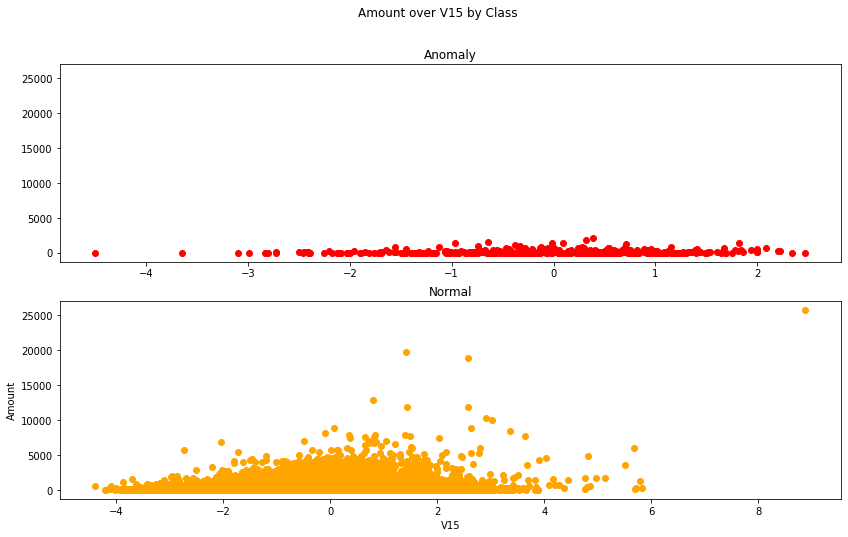

Amount vs V16


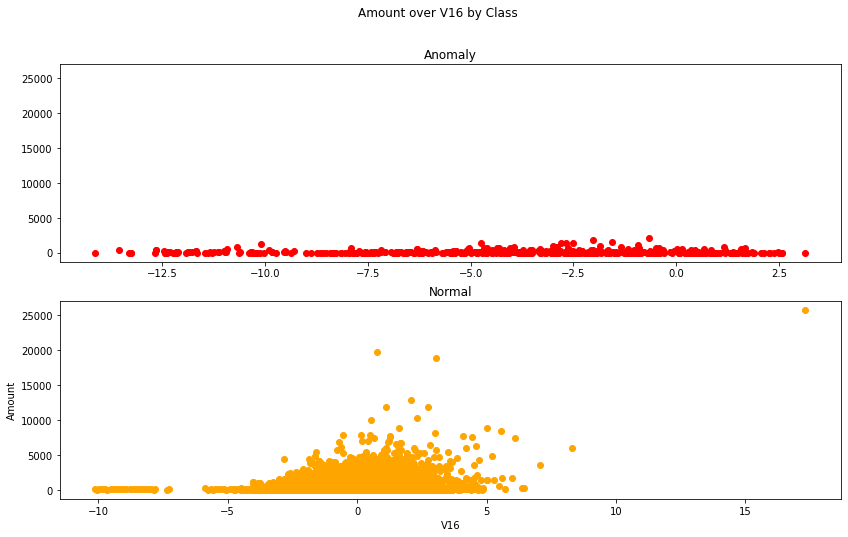

Amount vs V17


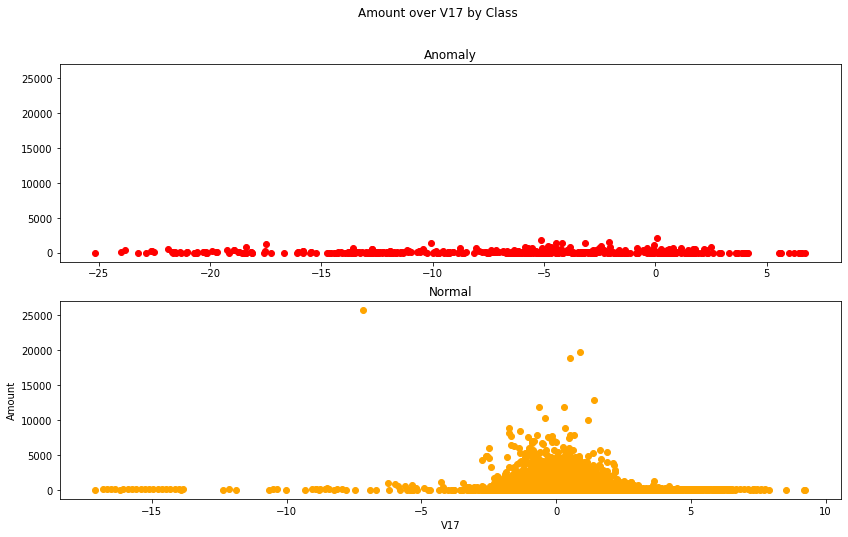

Amount vs V18


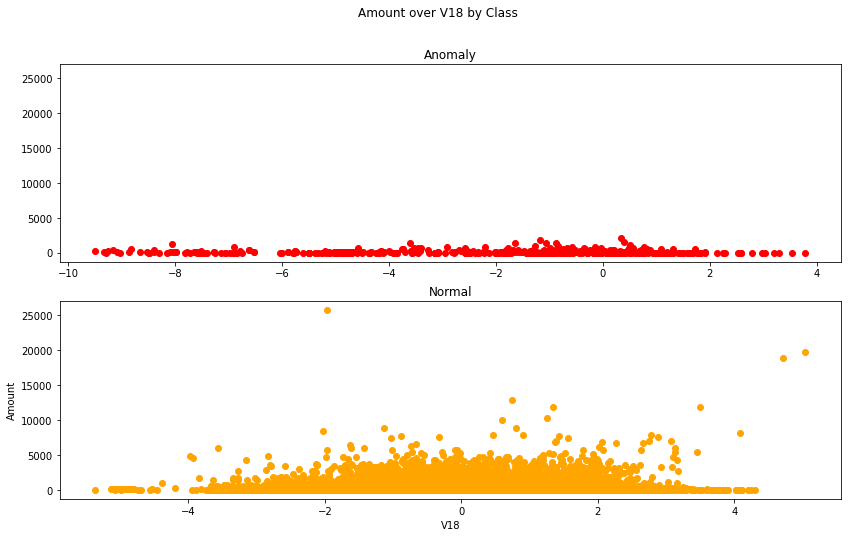

Amount vs V19


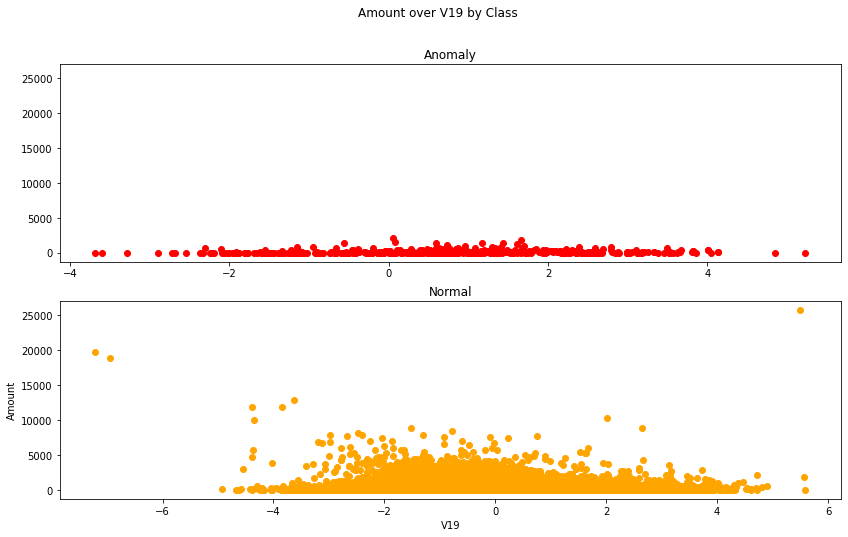

Amount vs V20


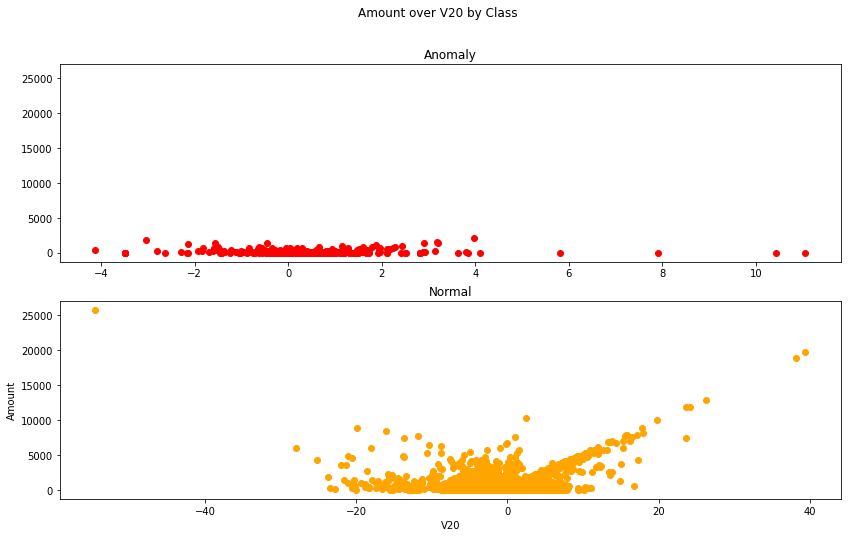

Amount vs V21


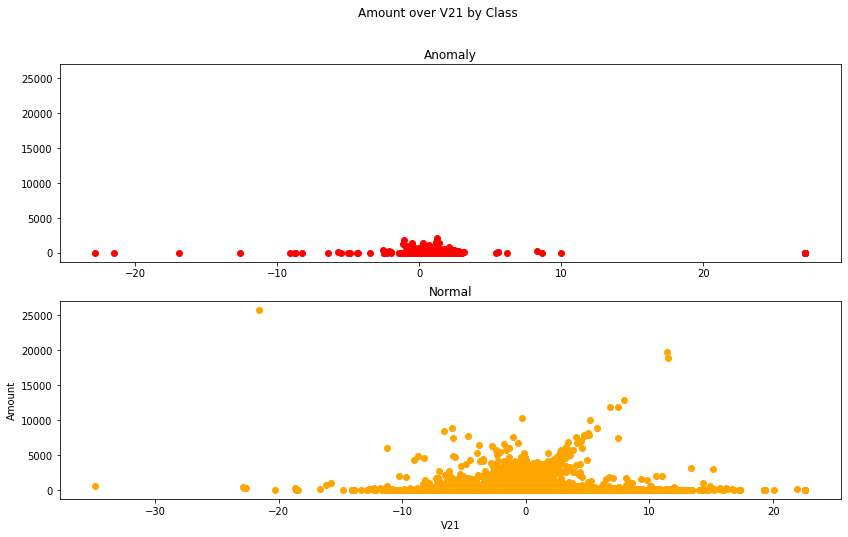

Amount vs V22


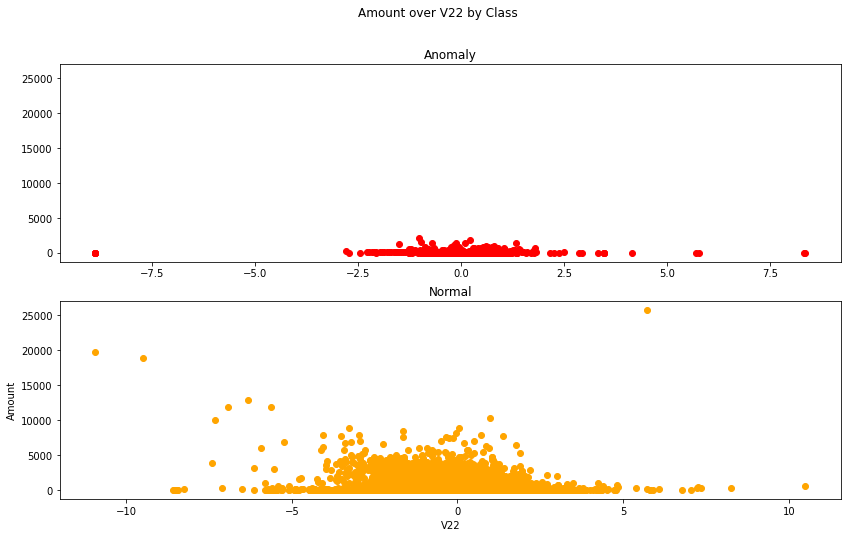

Amount vs V23


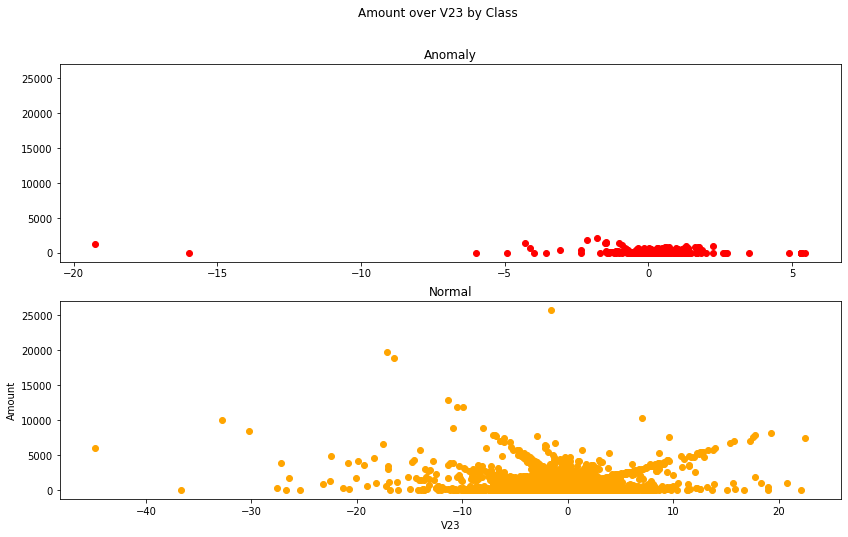

Amount vs V24


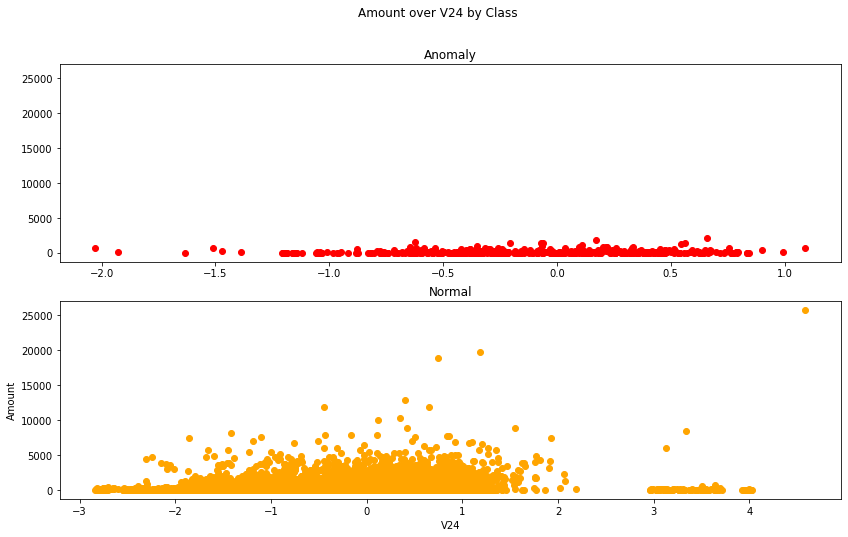

Amount vs V25


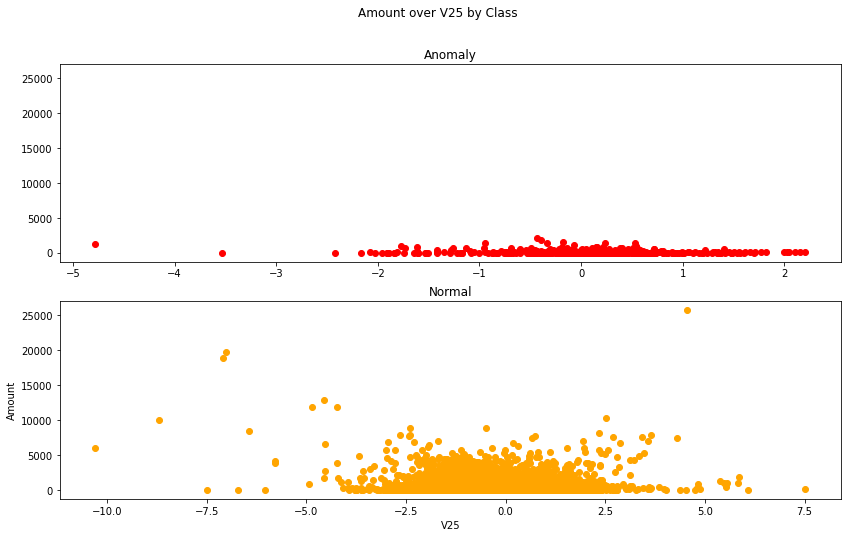

Amount vs V26


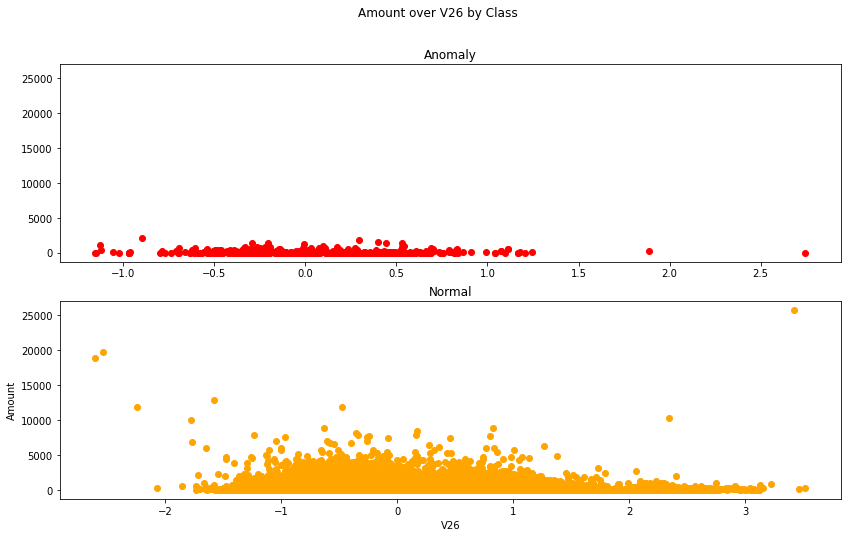

Amount vs V27


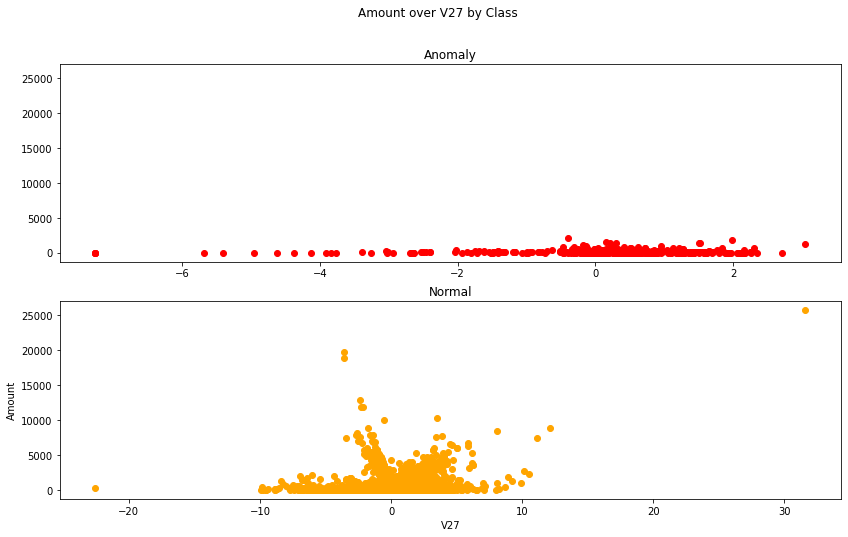

Amount vs V28


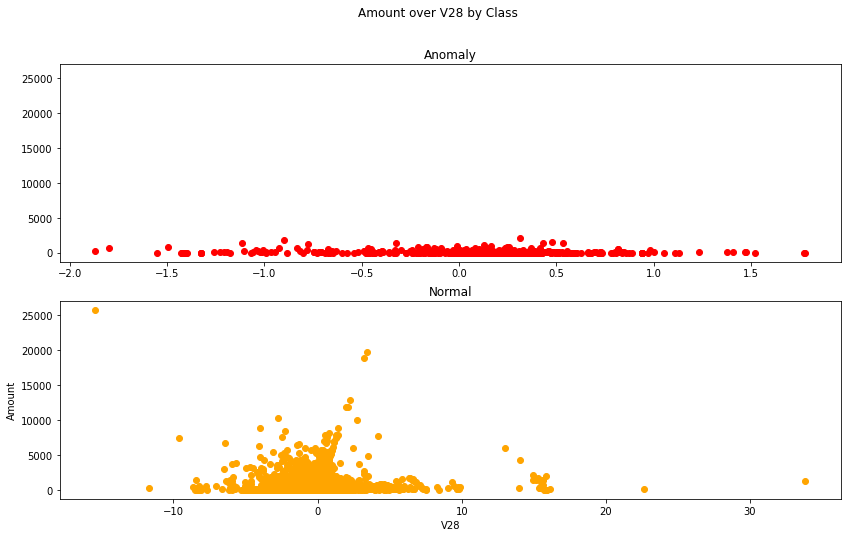

In [28]:
for f in range(1, 29):
    print(f"Amount vs V{f}")
    plot_scatter(df, f'V{f}', "Amount", sharey=True)

# 금액별 데이터 분포 시각화 결과, 몇개의 피처에서 정상 데이터와 부정 데이터의 클러스터가 겹치는 경우를 확인